<a id="up"></a>
# Project: -Wrangling and Analyze Data- 
## Analyzed BY *Samiha Amroune*


# Introduction:

This is the 4th project provided by **[Udacity](https://www.udacity.com/)** for **[DNA](https://www.udacity.com/course/data-analyst-nanodegree--nd002)** students

In this project; The dataset that we will be wrangling (and analyzing and visualizing) is the tweet archive of Twitter user [@dog_rates](https://twitter.com/dog_rates), also known as [WeRateDogs](https://en.wikipedia.org/wiki/WeRateDogs). WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because ["they're good dogs Brent."](https://knowyourmeme.com/memes/theyre-good-dogs-brent) WeRateDogs has over 4 million followers and has received international media coverage.

### Project Steps Overview

- [Gathering data](#get)

- [Assessing data](#asses)

- [Cleaning data](#cl)

- [Storing data](#sort)

- [Analyzing, and visualizing data](#vis)

<a id="get"></a>
## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Import all libraries that we need
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from bs4 import BeautifulSoup as bs
import requests
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer
%matplotlib inline

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.set_option.html?highlight=pd%20set_option

In [2]:
#I Used these options to see all dataframe content uncomment them to see more
'''
# set up display area to show dataframe in jupyter qtconsole
#display all text in a cell without truncation
pd.set_option('display.max_rows', None) # set value to ‘None’ value means unlimited
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
'''

"\n# set up display area to show dataframe in jupyter qtconsole\n#display all text in a cell without truncation\npd.set_option('display.max_rows', None) # set value to ‘None’ value means unlimited\npd.set_option('display.max_columns', None)\npd.set_option('display.width', None)\n"

In [3]:
# Open the csv file
df_twt_arch = pd.read_csv('twitter-archive-enhanced.csv')
df_twt_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# Download the image prediction file using the link provided to Udacity students
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
image_request = requests.get(url, allow_redirects=True)

open('image_predictions.tsv', 'wb').write(image_request.content)

335079

In [5]:
# read image-predictions.tsv file
df_img = pd.read_csv('image-predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
'''
consumer_key = 'Put your keys here'
consumer_secret = 'Put your keys here'
access_token = 'Put your keys here'
access_secret = 'Put your keys here'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_twt_arch.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
            #AttributeError: module 'tweepy' has no attribute 'TweepError'
            #https://knowledge.udacity.com/questions/743507
        except Exception as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)
'''

'\nconsumer_key = \'Put your keys here\'\nconsumer_secret = \'Put your keys here\'\naccess_token = \'Put your keys here\'\naccess_secret = \'Put your keys here\'\n\nauth = OAuthHandler(consumer_key, consumer_secret)\nauth.set_access_token(access_token, access_secret)\n\napi = tweepy.API(auth, wait_on_rate_limit=True)\n\n# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = df_twt_arch.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in

>I got this issue from tweeter, regarding to the fail status, tweeter rejecting my access to the request API.
I will use the file provided by **Udacity**

![img/error.png](img/error.png)

In [7]:
# Create dataframe from tweet-json.txt file
js_data = [] 

with open('tweet-json.txt', encoding='utf-8') as js_file:
    # loop line by line and append values to the created dataframe
    
    for line in js_file:
        data = json.loads(line)
        tweet_id = data['id']
        tweet = data['full_text']
        url_tweet = tweet[tweet.find('https'):]
        favorite_count = data['favorite_count']
        retweet_count = data['retweet_count']  
        retweet_status = data['retweet_status'] = data.get('retweet_status', 'Original tweet')
        if retweet_status == 'Original tweet':
            url = url_tweet
        else:
            retweeted_status = 'A retweet'
            url = 'A retweet'
        
    
        js_data.append({'tweet_id': tweet_id,'favorite_count': favorite_count,'retweet_status': retweet_status,
                     'url': url,'retweet_count': retweet_count})

# create a new DataFrame

df_js = pd.DataFrame(js_data, columns = ['tweet_id', 'favorite_count','retweet_count', 'retweet_status', 'url'])
                                          
                                                           
df_js.head()

df_js.to_csv('tweet_json.txt', index=False)

In [8]:
# Read the dataframe created
df_json = pd.read_csv('tweet_json.txt')

<a id="asses"></a>
## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



<a id='list'></a>
## [Quality Issue](#quali)

### From df_twt_arch :
>    **1** - In columns: ('doggo', 'floofer', 'pupper', 'puppo', 'name') 'None' assigned instead of 'NaN' for empty missing data **{visual assessment}**<br><br>
[See Solution](#s1)<br>
[Noticed it in](#q1) <br><br>
**2** - columns not needed: ('in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id',
                        'retweeted_status_user_id','retweeted_status_timestamp')
        - columns ('source' ,'text','name) need to rename to be familliar with users **{visual assessment}** <br><br>
[See Solution](#s2)<br>
[Noticed it in](#q2) <br><br>
**3** - column timestamp dtype should be datetime and split into two columns date and time for better visualisation**{programmatic assessment}** <br><br>
[See Solution](#s3)<br>
[Noticed it in](#q3) <br><br>
**4** - 'tweet_id' must be a string.**{programmatic assessment}** <br><br>
[See Solution](#s4)<br>
[Noticed it in](#q4) <br><br>
**5** - 'source' column contains tag html. **{visual assessment}** <br><br>
[See Solution](#s5)<br>
[Noticed it in](#q5) <br><br>
**6** -  column 'name' has values: 'None', 'a', 'O', 'Devón'. **{programmatic assessment}** <br><br>
[See Solution](#s6)<br>
[Noticed it in](#q6) <br><br>
<br>
**7** -  expanded_urls has missing value and inccorrect urls **{programmatic assessment}** and **{visual assessment}**<br><br>
[See Solution](#s7)<br>
[Noticed it in](#q7) <br><br>
**8** - Rating dinominator must be equal to 10 there are other values:<br>
           ( 0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2) **{programmatic assessment** <br><br>
[See Solution](#s8)<br>
[Noticed it in](#q8) <br><br>
<br>
    
### From df_img:
>   **9**- The predictions ('P1', 'P2', 'P3') columns are not clear and familiar to the reader
and have strange predictions  (spatula, barrow, minibus, etc) **{programmatic assessment}**<br> 
[See Solution](#s9)<br>
[Noticed it in](#q9) <br><br>
    **10** - Some "tweet_ids" have same "jpg_url", after checking using the urls: <br>
     (https://twitter.com/dog_rates/status/803692223237865472) <br>
     (https://twitter.com/dog_rates/status/691416866452082688) <br>
     and changing the ids they were the same tweet **{programmatic assessment}** <br>
     - ids img does not exist "Hmm...this page doesn’t exist. Try searching for something else": **{visual assessment}** <br>
    - 759566828574212096 <br>
    - 802247111496568832 <br>
    - 851953902622658560 <br>
    - 842892208864923648 <br>
    - 861769973181624320 <br>
    - 873697596434513921 <br>
    - 888202515573088257<br><br>
[See Solution](#s10)<br>
[Noticed it in](#q10) <br><br>
   
    
### From df_json:
>   **11** <br>
    - Ivalid urls: <span style="color:red;">(https://… )( https:/…) ( https:/t.c…)</span><br>
    - 175 duplicated url <br>
**{programmatic assessment}**<br><br>
[See Solution](#s11)<br>
[Noticed it in](#q11) <br><br>
    **12**- retweet_status has one value 'Original tweet', no need it<br><br>
[See Solution](#s12)<br>
[Noticed it in](#q12) <br><br>
 **13** - Tweets missing retweet count and favorite count **{programmatic assessment}** <br><br>
[See Solution](#s13)<br>
[Noticed it in](#q13) <br><br>

<a id='list2'></a>
## [Tidiness Issue](#tidi)

>   **1**- doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable 'dogtionary'.
    **{visual assessment}** <br><br>
[See Solution](#t1)<br>
[Noticed it in](#tt1) <br><br>
    **2**- rating nominator, rating dinominator should be one column since rating dinominator always be 10
     **{visual assessment}** <br><br>
[See Solution](#t2)<br>
[Noticed it in](#tt2) <br><br>
    **3**- Dataframes: twitter_archive, image_predictions, and tweet_json, Should be one df (twitter_master_df) **{visual assessment}** <br>
[See Solution](#t3)<br>
[Noticed it in](#tt3) <br><br>
 **4**- in twitter_master_df: expanded_urls and url have same values **{visual assessment}** <br>
[See Solution](#t4)<br>
[Noticed it in](#tt4) <br>

In [9]:
# Create functions to avoid repeating the same code
# value counts function of each column 
def val_count(df):
    for i in df.columns:
        print(i,'\n', df[i].value_counts())

# duplicated function of each column   
def duplic(df):
    for i in df.columns:
        print(i,'\n', df[i].duplicated().sum())

<a id="tt3">issue 3 Tidi</a>

In [10]:
# Display the dataframe and print number of columns and rows
print(df_json.shape)
df_json

(2354, 5)


,tweet_id,favorite_count,retweet_count,retweet_status,url
0,892420643555336193,39467,8853,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,Original tweet,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,Original tweet,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,Original tweet,https://t.co/AtUZn91f7f
...,...,...,...,...,...
2349,666049248165822465,111,41,Original tweet,https://t.co/4B7cOc1EDq
2350,666044226329800704,311,147,Original tweet,https://t.co/DWnyCjf2mx
2351,666033412701032449,128,47,Original tweet,https://t.co/y671yMhoiR
2352,666029285002620928,132,48,Original tweet,https://t.co/r7mOb2m0UI


In [11]:
# Display the dataframe and print number of columns and rows
print(df_img.shape)
df_img

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<a id="q1">issue 1 Quality</a><br>
<a id="tt1">issue 1 Tidi</a><br>
<a id="tt2">issue 2 Tidi</a>

In [12]:
# Display the dataframe and print number of columns and rows
print(df_twt_arch.shape)
df_twt_arch

(2356, 17)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<a id="q2">issue2 Quality</a><br>
<a id="q3">issue3 Quality</a><br>
<a id="q4">issue4 Quality</a>

In [13]:
# Get for more info
df_twt_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

[Back To Quality list](#list)

<a id="q7">issue7 Quality</a>

In [14]:
df_twt_arch.expanded_urls.unique()

array(['https://twitter.com/dog_rates/status/892420643555336193/photo/1',
       'https://twitter.com/dog_rates/status/892177421306343426/photo/1',
       'https://twitter.com/dog_rates/status/891815181378084864/photo/1',
       ...,
       'https://twitter.com/dog_rates/status/666033412701032449/photo/1',
       'https://twitter.com/dog_rates/status/666029285002620928/photo/1',
       'https://twitter.com/dog_rates/status/666020888022790149/photo/1'],
      dtype=object)

In [15]:
df_twt_arch['expanded_urls'].isnull().sum()

59

In [16]:
df_twt_arch[df_twt_arch['expanded_urls'].isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


[Back To Quality list](#list)

In [17]:
# Get for more info
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   int64 
 1   favorite_count  2354 non-null   int64 
 2   retweet_count   2354 non-null   int64 
 3   retweet_status  2354 non-null   object
 4   url             2354 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [18]:
# Get for more info
df_img.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
# Check duplicates
df_twt_arch.duplicated().sum()

0

In [20]:
# Check duplicates
df_json.duplicated().sum()

0

In [21]:
# Check duplicates
df_img.duplicated().sum()

0

In [22]:
# Get a descriptive statistics summary 
df_twt_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [23]:
# Get a descriptive statistics summary 
df_json.describe()

,tweet_id,favorite_count,retweet_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


In [24]:
# Get a descriptive statistics summary 
df_img.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [25]:
# check value_counts in each column in df_json
val_count(df_json)

tweet_id 
 892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
774757898236878852    1
774639387460112384    1
774314403806253056    1
773985732834758656    1
666020888022790149    1
Name: tweet_id, Length: 2354, dtype: int64
favorite_count 
 0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64
retweet_count 
 1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64
retweet_status 
 Original tweet    2354
Name: retweet_status, dtype: int64
url 
 https:/…                   17
0                          17
https://…                  15
…                          11
https://t.c…                7
                           ..
https://t.co/HmwrdfEfUE     1
https://t.co/uPUAot

<a id="q11">issue11 Quality</a>

In [26]:
# Get list of duplicated urls
np.array(df_json[df_json['url'].duplicated()])

array([[873337748698140672, 0, 1667, 'Original tweet', 'https:/…'],
       [870726314365509632, 121, 3, 'Original tweet', 's'],
       [869988702071779329, 0, 25661, 'Original tweet', '…'],
       [868880397819494401, 55098, 12518, 'Original tweet',
        'https://t.co/r28jFx9uyF'],
       [868639477480148993, 0, 2240, 'Original tweet', 'https://…'],
       [863471782782697472, 0, 2687, 'Original tweet', 'https://…'],
       [860177593139703809, 0, 33421, 'Original tweet', 'https://t.c…'],
       [858860390427611136, 0, 8805, 'Original tweet', '…'],
       [857214891891077121, 242, 20, 'Original tweet', '0'],
       [856602993587888130, 0, 11633, 'Original tweet', '…'],
       [856288084350160898, 545, 17, 'Original tweet', '0'],
       [855862651834028034, 320, 27, 'Original tweet', 'h'],
       [855860136149123072, 4407, 1058, 'Original tweet', '0'],
       [855245323840757760, 0, 6568, 'Original tweet', '…'],
       [855138241867124737, 0, 50, 'Original tweet', '…'],
       [85293

# Duplicated url:
"…",
    "s",
    "0",
    "5",
    "h",
    "n",
    "e",
    "g",
    "y",
    "t",
    "https://…",
    "https://t.c…",
    "https://t.c…",
    "https://…",
    "https://t.co/…",
    'https://t.co/R6wJyC2Tey',
    'https://t.co/pbKOesr8Tg',
    'https://t.co/y5KarNXWXt',
    'https://t.co/SATN4If5H5',
    'https://t.co/xo7FZFIAao',
    'https://t.co/QV5nx6otZR',
    'https://t.co/Xl37lQEWd0',
    'https://t.co/WId5lxNdPH',
    'https://t.co/Bb3xnpsWBC',
    'https://t.co/2S6oye3XqK',
    'https://t.co/iJABMhVidf',
    'https://t.co/eqmkr2gmPH',
    'https://t.co/J5Mqn8VeYq',
    'https://t.co/QnfO7HEQGA',
    'https://t.co/0aDF62KVP7',
    'https://t.co/HVGs5aAKAn',
    'https://t.co/Ezu6jQrKAZ',
    'https://t.co/oHKJHghrp5',
    'https://t.co/iHe6liLwWR',
    'https://t.co/JKXh0NbBNL',
    'https://t.co/fR1P3g5I6k',
    'https://t.co/VGPH0TfESw',
    'https://t.co/e3LPMAHj7p',
    'https://t.co/zxw8d5g94P',
    'https://t.co/u1ulQ5heLX',
    'https://t.co/pG2inLaOda',
    'https://t.co/ghyT4Ubk1r',
    'https://t.co/vtVHtKFtBH',
    'https://t.co/XQ1tRUmO3z',
    'https://t.co/4Kn9GEHXiE',
    'https://t.co/hyAC5Hq9GC',
    'https://t.co/NLOHmlENag',
    'https://t.co/o5J479bZUC',
    'https://t.co/BXIuvkQO9b',
    'https://t.co/bROYbceZ1u',
    'https://t.co/lprdOylVpS',
    'https://t.co/v5m2bIukXc',
    'https://t.co/dsv4xAtfv7',
    'https://t.co/iy7ylyZcsE',
    'https://t.co/1acHQS8rvK',
    'https://t.co/SuXcI9B7pQ',
    'https://t.co/gx3xF5mZbo',
    'https://t.co/eSvz4EapHH',
    'https://t.co/guDkLrX8zV',
    'https://t.co/E6bGWf9EOm',
    'https://t.co/nBJ5RE4yHb',
    'https://t.co/wdgY9oHPrT',
    'https://t.co/I1bJUzUEW5',
    'https://t.co/AsykOwMrXQ',
    'https://t.co/t0cEeRbcXJ',
    'https://t.co/T7Jr4Gw4sC',
    'https://t.co/nfprKAXqwu',
    'https://t.co/zrMVdfFej6',
    'https://t.co/mH0IOyFdIG',
    'https://t.co/x0gV2Ck3AD',
    'https://t.co/xIfrsMNLBR',
    'https://t.co/rLHGx3VAF3',
    'https://t.co/O5IUmRHRIh',
    'https://t.co/dgvTPZ9tgI',
    'https://t.co/aI7umZHIq7',
    'https://t.co/Ln89R4FP7v',
    'https://t.co/TU4sZogVIq',
    'https://t.co/x5gXRS1abq',
    'https://t.co/r28jFx9uyF',
    'https://t.co/liJGwMp17E',
    'https://t.co/rLi83ZyCL5',
    'https://t.co/YOC1fHFCSb',
    'https://t.co/AdPKrI8BZ1',
    'https://t.co/btzf1zTDeQ',
    'https://t.co/MiMKtsLN6k',
    'https://t.co/hfi264QwYM',
    'https://t.co/DkBYaCAg2d',
    'https://t.co/f1h2Fsalv9'

>Next i will check each link using 'https://twitter.com/dog_rates/status/tweet_id' to figure what kinds of these tweets

In [27]:
df_json.query('url == "…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
100,872668790621863937,0,31,Original tweet,…
117,869988702071779329,0,25661,Original tweet,…
170,858860390427611136,0,8805,Original tweet,…
181,856602993587888130,0,11633,Original tweet,…
193,855245323840757760,0,6568,Original tweet,…
194,855138241867124737,0,50,Original tweet,…
301,836648853927522308,0,626,Original tweet,…
318,834477809192075265,0,12224,Original tweet,…
326,833732339549220864,0,251,Original tweet,…
356,830173239259324417,0,6554,Original tweet,…


> After verification: in this 'url == "..."' some are retweets and others are not dog ratings

In [28]:
df_json.query('url == "s"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
54,881633300179243008,129,7,Original tweet,s
112,870726314365509632,121,3,Original tweet,s
575,800859414831898624,778,113,Original tweet,s
1903,674606911342424069,1013,115,Original tweet,s
2036,671550332464455680,967,229,Original tweet,s


>After verification: in this 'url == "s"' some are Replying and others are not dog ratings

In [29]:
df_json.query('url == "0"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
147,863427515083354112,2363,105,Original tweet,0
178,857214891891077121,242,20,Original tweet,0
185,856288084350160898,545,17,Original tweet,0
188,855860136149123072,4407,1058,Original tweet,0
233,847617282490613760,7558,468,Original tweet,0
289,838150277551247360,1824,370,Original tweet,0
290,838085839343206401,150,0,Original tweet,0
345,831926988323639298,369,39,Original tweet,0
408,823333489516937216,777,31,Original tweet,0
497,813130366689148928,4968,513,Original tweet,0


>After verification: in this 'url == "0"' are Replying

In [30]:
df_json.query('url == "5"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
341,832088576586297345,72,3,Original tweet,5
2187,668967877119254528,161,25,Original tweet,5


>After verification: in this 'url == "5"' are Replying

In [31]:
df_json.query('url == "https://…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
67,879130579576475649,0,7181,Original tweet,https://…
123,868639477480148993,0,2240,Original tweet,https://…
145,863471782782697472,0,2687,Original tweet,https://…
246,845459076796616705,0,15071,Original tweet,https://…
272,840728873075638272,0,18285,Original tweet,https://…
308,835536468978302976,0,1939,Original tweet,https://…
381,827228250799742977,0,13517,Original tweet,https://…
437,820013781606658049,0,1369,Original tweet,https://…
474,816062466425819140,0,1207,Original tweet,https://…
573,801127390143516673,0,4627,Original tweet,https://…


>After verification: in this 'url == "https://…"' are WeRateDogs® Retweeted

In [32]:
df_json.query('url == "https://t.c…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
90,874434818259525634,0,15546,Original tweet,https://t.c…
164,860177593139703809,0,33421,Original tweet,https://t.c…
229,847978865427394560,0,3652,Original tweet,https://t.c…
505,812747805718642688,0,8067,Original tweet,https://t.c…
537,806620845233815552,0,6426,Original tweet,https://t.c…
744,780092040432480260,0,2655,Original tweet,https://t.c…
831,768554158521745409,0,6719,Original tweet,https://t.c…


>After verification: in this 'url == "https://t.c…"' are Retweeted

In [33]:
df_json.query('url == "h"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
184,856330835276025856,0,731,Original tweet,h
187,855862651834028034,320,27,Original tweet,h


>After verification: in this 'url == "h"': <br>
    - This Tweet id 856330835276025856 is from an account that no longer exists <br>
    - 855862651834028034 not a dog rating

In [34]:
df_json.query('url == "https://…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
67,879130579576475649,0,7181,Original tweet,https://…
123,868639477480148993,0,2240,Original tweet,https://…
145,863471782782697472,0,2687,Original tweet,https://…
246,845459076796616705,0,15071,Original tweet,https://…
272,840728873075638272,0,18285,Original tweet,https://…
308,835536468978302976,0,1939,Original tweet,https://…
381,827228250799742977,0,13517,Original tweet,https://…
437,820013781606658049,0,1369,Original tweet,https://…
474,816062466425819140,0,1207,Original tweet,https://…
573,801127390143516673,0,4627,Original tweet,https://…


>After verification: in this 'url == "https://…"' are Retweeted

In [35]:
df_json.query('url == "https://t…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
158,860981674716409858,0,2334,Original tweet,https://t…
203,852936405516943360,0,2243,Original tweet,https://t…
249,845098359547420673,0,8640,Original tweet,https://t…
433,820494788566847489,0,648,Original tweet,https://t…
594,798701998996647937,0,9126,Original tweet,https://t…
676,789280767834746880,0,5747,Original tweet,https://t…
816,770743923962707968,0,52360,Original tweet,https://t…


>After verification: in this 'url == "https://t…"' are Retweeted

In [36]:
df_json.query('url == "https://t.co/…"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
179,857062103051644929,0,183,Original tweet,https://t.co/…
306,835685285446955009,0,9327,Original tweet,https://t.co/…
604,798576900688019456,0,6871,Original tweet,https://t.co/…
748,779124354206535695,0,21324,Original tweet,https://t.co/…


> After verification: in this 'url == "https://t.co/…"' some are Retweeted and others are not dog ratings

In [37]:
df_json.query('url == "n"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
29,886267009285017600,117,4,Original tweet,n
273,840698636975636481,197,3,Original tweet,n
374,828361771580813312,2408,195,Original tweet,n


> After verification: in this 'url == "n"' some are Replying and others are not dog ratings

In [38]:
df_json.query('url == "https://t.co/roqIxCvEB3"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
656,791774931465953280,37818,21156,Original tweet,https://t.co/roqIxCvEB3
2210,668587383441514497,1760,1174,Original tweet,https://t.co/roqIxCvEB3


> After cheking this 'url == "https://t.co/roqIxCvEB3"' is the same dog voting for the second time

In [39]:
df_json.query('url == "e"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
426,821153421864615936,280,10,Original tweet,e
1444,696490539101908992,1339,170,Original tweet,e
1661,682808988178739200,1953,210,Original tweet,e
1687,681340665377193984,1803,313,Original tweet,e


> After checking this 'url == "e"' Are replaying tweets

In [40]:
df_json.query('url == "g"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
386,826598799820865537,5637,292,Original tweet,g
1596,686035780142297088,1274,138,Original tweet,g


>After checking this 'url == "g"' Are replaying tweets

In [41]:
df_json.query('url == "y"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
706,785515384317313025,6800,1477,Original tweet,y
841,766714921925144576,2872,438,Original tweet,y
965,750381685133418496,758,39,Original tweet,y


> After checking this 'url == "y"' are Not a dog rating


In [42]:
df_json.query('url == "t"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
227,848213670039564288,8834,832,Original tweet,t
700,786051337297522688,1614,179,Original tweet,t
1521,690607260360429569,313,19,Original tweet,t


> After checking this 'url == "t"' are replaying

# Next 
> After verification all next links: first one is Retweeted and the second the origin tweet

In [43]:
df_json.query('url == "https://t.co/R6wJyC2Tey"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
529,808134635716833280,0,6961,Original tweet,https://t.co/R6wJyC2Tey
572,801167903437357056,27386,6961,Original tweet,https://t.co/R6wJyC2Tey


In [44]:
df_json.query('url == "https://t.co/pbKOesr8Tg"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
434,820446719150292993,0,2980,Original tweet,https://t.co/pbKOesr8Tg
583,800141422401830912,17092,2980,Original tweet,https://t.co/pbKOesr8Tg


In [45]:
df_json.query('url == "https://t.co/y5KarNXWXt"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
617,796177847564038144,0,16628,Original tweet,https://t.co/y5KarNXWXt
618,796149749086875649,36177,16628,Original tweet,https://t.co/y5KarNXWXt


In [46]:
df_json.query('url == "https://t.co/SATN4If5H5"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
35,885311592912609280,0,19297,Original tweet,https://t.co/SATN4If5H5
355,830583320585068544,73397,19297,Original tweet,https://t.co/SATN4If5H5


In [47]:
df_json.query('url == "https://t.co/xo7FZFIAao"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
210,851953902622658560,0,10706,Original tweet,https://t.co/xo7FZFIAao
362,829374341691346946,38074,10706,Original tweet,https://t.co/xo7FZFIAao


In [48]:
df_json.query('url == "https://t.co/QV5nx6otZR"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
358,829878982036299777,0,5757,Original tweet,https://t.co/QV5nx6otZR
383,826958653328592898,23767,5757,Original tweet,https://t.co/QV5nx6otZR


In [49]:
df_json.query('url == "https://t.co/Xl37lQEWd0"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
906,757729163776290825,0,9299,Original tweet,https://t.co/Xl37lQEWd0
1746,679062614270468097,18712,9299,Original tweet,https://t.co/Xl37lQEWd0


In [50]:
df_json.query('url == "https://t.co/WId5lxNdPH"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
599,798673117451325440,0,6485,Original tweet,https://t.co/WId5lxNdPH
1856,675501075957489664,18482,6485,Original tweet,https://t.co/WId5lxNdPH


In [51]:
df_json.query('url == "https://t.co/Bb3xnpsWBC"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
947,752309394570878976,0,18963,Original tweet,https://t.co/Bb3xnpsWBC
1863,675354435921575936,35178,18963,Original tweet,https://t.co/Bb3xnpsWBC


In [52]:
df_json.query('url == "https://t.co/2S6oye3XqK"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
719,783347506784731136,0,6533,Original tweet,https://t.co/2S6oye3XqK
1915,674291837063053312,15817,6533,Original tweet,https://t.co/2S6oye3XqK


In [53]:
df_json.query('url == "https://t.co/iJABMhVidf"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
810,771171053431250945,0,8705,Original tweet,https://t.co/iJABMhVidf
1966,673320132811366400,14441,8705,Original tweet,https://t.co/iJABMhVidf


In [54]:
df_json.query('url == "https://t.co/eqmkr2gmPH"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
600,798665375516884993,0,4519,Original tweet,https://t.co/eqmkr2gmPH
2021,671896809300709376,9016,4519,Original tweet,https://t.co/eqmkr2gmPH


In [55]:
df_json.query('url == "https://t.co/J5Mqn8VeYq"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
601,798644042770751489,0,2153,Original tweet,https://t.co/J5Mqn8VeYq
2108,670444955656130560,7120,2153,Original tweet,https://t.co/J5Mqn8VeYq


In [56]:
df_json.query('url == "https://t.co/QnfO7HEQGA"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
893,759159934323924993,0,1359,Original tweet,https://t.co/QnfO7HEQGA
2125,670319130621435904,4110,1359,Original tweet,https://t.co/QnfO7HEQGA


In [57]:
df_json.query('url == "https://t.co/0aDF62KVP7"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
602,798628517273620480,0,2272,Original tweet,https://t.co/0aDF62KVP7
2267,667509364010450944,7148,2272,Original tweet,https://t.co/0aDF62KVP7


In [58]:
df_json.query('url == "https://t.co/HVGs5aAKAn"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
595,798697898615730177,0,7602,Original tweet,https://t.co/HVGs5aAKAn
1231,712809025985978368,20378,7602,Original tweet,https://t.co/HVGs5aAKAn


In [59]:
df_json.query('url == "https://t.co/Ezu6jQrKAZ"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
870,761371037149827077,0,20500,Original tweet,https://t.co/Ezu6jQrKAZ
1244,711694788429553666,35865,20500,Original tweet,https://t.co/Ezu6jQrKAZ


In [60]:
df_json.query('url == "https://t.co/oHKJHghrp5"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
727,782021823840026624,0,7236,Original tweet,https://t.co/oHKJHghrp5
1300,707610948723478529,18557,7236,Original tweet,https://t.co/oHKJHghrp5


In [61]:
df_json.query('url == "https://t.co/iHe6liLwWR"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
758,778396591732486144,0,14198,Original tweet,https://t.co/iHe6liLwWR
1360,703041949650034688,28996,14198,Original tweet,https://t.co/iHe6liLwWR


In [62]:
df_json.query('url == "https://t.co/JKXh0NbBNL"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
596,798694562394996736,0,5812,Original tweet,https://t.co/JKXh0NbBNL
1378,701214700881756160,13475,5812,Original tweet,https://t.co/JKXh0NbBNL


In [63]:
df_json.query('url == "https://t.co/fR1P3g5I6k"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
554,803692223237865472,0,8689,Original tweet,https://t.co/fR1P3g5I6k
1509,691416866452082688,21253,8689,Original tweet,https://t.co/fR1P3g5I6k


In [64]:
df_json.query('url == "https://t.co/VGPH0TfESw"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
866,761750502866649088,0,4535,Original tweet,https://t.co/VGPH0TfESw
1609,685325112850124800,10471,4535,Original tweet,https://t.co/VGPH0TfESw


In [65]:
df_json.query('url == "https://t.co/e3LPMAHj7p"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
653,791821351946420224,0,24514,Original tweet,https://t.co/e3LPMAHj7p
1623,684830982659280897,38551,24514,Original tweet,https://t.co/e3LPMAHj7p


In [66]:
df_json.query('url == "https://t.co/zxw8d5g94P"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
888,759566828574212096,0,24319,Original tweet,https://t.co/zxw8d5g94P
1075,739544079319588864,43694,24319,Original tweet,https://t.co/zxw8d5g94P


In [67]:
df_json.query('url == "https://t.co/u1ulQ5heLX"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
681,788552643979468800,0,8407,Original tweet,https://t.co/u1ulQ5heLX
1093,736392552031657984,19450,8407,Original tweet,https://t.co/u1ulQ5heLX


In [68]:
df_json.query('url == "https://t.co/pG2inLaOda"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
777,775898661951791106,0,17621,Original tweet,https://t.co/pG2inLaOda
1111,733109485275860992,44619,17621,Original tweet,https://t.co/pG2inLaOda


In [69]:
df_json.query('url == "https://t.co/ghyT4Ubk1r"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
475,816014286006976512,0,6154,Original tweet,https://t.co/ghyT4Ubk1r
1116,732005617171337216,16324,6154,Original tweet,https://t.co/ghyT4Ubk1r


In [70]:
df_json.query('url == "https://t.co/vtVHtKFtBH"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
845,766078092750233600,0,2970,Original tweet,https://t.co/vtVHtKFtBH
1149,725842289046749185,7691,2970,Original tweet,https://t.co/vtVHtKFtBH


In [71]:
df_json.query('url == "https://t.co/XQ1tRUmO3z"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
941,752701944171524096,0,3291,Original tweet,https://t.co/XQ1tRUmO3z
1648,683515932363329536,8058,3291,Original tweet,https://t.co/XQ1tRUmO3z


In [72]:
df_json.query('url == "https://t.co/4Kn9GEHXiE"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
654,791784077045166082,0,11271,Original tweet,https://t.co/4Kn9GEHXiE
1674,682088079302213632,20108,11271,Original tweet,https://t.co/4Kn9GEHXiE


In [73]:
df_json.query('url == "https://t.co/hyAC5Hq9GC"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
769,776819012571455488,0,15839,Original tweet,https://t.co/hyAC5Hq9GC
1730,679828447187857408,39726,15839,Original tweet,https://t.co/hyAC5Hq9GC


In [74]:
df_json.query('url == "https://t.co/NLOHmlENag"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
924,754874841593970688,0,9193,Original tweet,https://t.co/NLOHmlENag
1742,679158373988876288,23568,9193,Original tweet,https://t.co/NLOHmlENag


In [75]:
df_json.query('url == "https://t.co/o5J479bZUC"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
820,770093767776997377,0,3520,Original tweet,https://t.co/o5J479bZUC
1061,741067306818797568,10342,3520,Original tweet,https://t.co/o5J479bZUC


In [76]:
df_json.query('url == "https://t.co/BXIuvkQO9b"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
740,780496263422808064,0,4319,Original tweet,https://t.co/BXIuvkQO9b
1052,742423170473463808,10812,4319,Original tweet,https://t.co/BXIuvkQO9b


In [77]:
df_json.query('url == "https://t.co/bROYbceZ1u"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
655,791780927877898241,0,4432,Original tweet,https://t.co/bROYbceZ1u
1018,746757706116112384,10520,4432,Original tweet,https://t.co/bROYbceZ1u


In [78]:
df_json.query('url == "https://t.co/lprdOylVpS"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
766,777641927919427584,0,4947,Original tweet,https://t.co/lprdOylVpS
963,750429297815552001,14569,4947,Original tweet,https://t.co/lprdOylVpS


In [79]:
df_json.query('url == "https://t.co/v5m2bIukXc"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
691,787111942498508800,0,7798,Original tweet,https://t.co/v5m2bIukXc
939,752932432744185856,13970,7798,Original tweet,https://t.co/v5m2bIukXc


In [80]:
df_json.query('url == "https://t.co/dsv4xAtfv7"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
309,835309094223372289,0,24013,Original tweet,https://t.co/dsv4xAtfv7
937,753039830821511168,41080,24013,Original tweet,https://t.co/dsv4xAtfv7


In [81]:
df_json.query('url == "https://t.co/iy7ylyZcsE"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
752,778774459159379968,0,11550,Original tweet,https://t.co/iy7ylyZcsE
903,758099635764359168,21302,11550,Original tweet,https://t.co/iy7ylyZcsE


In [82]:
df_json.query('url == "https://t.co/1acHQS8rvK"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
685,788070120937619456,0,3952,Original tweet,https://t.co/1acHQS8rvK
874,761004547850530816,12482,3952,Original tweet,https://t.co/1acHQS8rvK


In [83]:
df_json.query('url == "https://t.co/SuXcI9B7pQ"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
560,802624713319034886,0,3403,Original tweet,https://t.co/SuXcI9B7pQ
765,777684233540206592,12518,3403,Original tweet,https://t.co/SuXcI9B7pQ


In [84]:
df_json.query('url == "https://t.co/gx3xF5mZbo"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
660,791026214425268224,0,4858,Original tweet,https://t.co/gx3xF5mZbo
856,763837565564780549,14041,4858,Original tweet,https://t.co/gx3xF5mZbo


In [85]:
df_json.query('url == "https://t.co/eSvz4EapHH"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
799,772615324260794368,0,3914,Original tweet,https://t.co/eSvz4EapHH
852,765222098633691136,12902,3914,Original tweet,https://t.co/eSvz4EapHH


In [86]:
df_json.query('url == "https://t.co/guDkLrX8zV"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
342,832040443403784192,0,11131,Original tweet,https://t.co/guDkLrX8zV
822,769940425801170949,34948,11131,Original tweet,https://t.co/guDkLrX8zV


In [87]:
df_json.query('url == "https://t.co/E6bGWf9EOm"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
605,798340744599797760,0,3924,Original tweet,https://t.co/E6bGWf9EOm
807,771770456517009408,13356,3924,Original tweet,https://t.co/E6bGWf9EOm


In [88]:
df_json.query('url == "https://t.co/nBJ5RE4yHb"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
452,818588835076603904,0,7126,Original tweet,https://t.co/nBJ5RE4yHb
792,773547596996571136,24553,7126,Original tweet,https://t.co/nBJ5RE4yHb


In [89]:
df_json.query('url == "https://t.co/wdgY9oHPrT"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
585,799774291445383169,0,5488,Original tweet,https://t.co/wdgY9oHPrT
784,775085132600442880,17281,5488,Original tweet,https://t.co/wdgY9oHPrT


In [90]:
df_json.query('url == "https://t.co/I1bJUzUEW5"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
565,802247111496568832,0,5247,Original tweet,https://t.co/I1bJUzUEW5
750,779056095788752897,16500,5247,Original tweet,https://t.co/I1bJUzUEW5


In [91]:
df_json.query('url == "https://t.co/AsykOwMrXQ"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
551,804413760345620481,0,3712,Original tweet,https://t.co/AsykOwMrXQ
709,784826020293709826,11310,3712,Original tweet,https://t.co/AsykOwMrXQ


In [92]:
df_json.query('url == "https://t.co/t0cEeRbcXJ"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
545,805823200554876929,0,9374,Original tweet,https://t.co/t0cEeRbcXJ
712,784183165795655680,22513,9374,Original tweet,https://t.co/t0cEeRbcXJ


In [93]:
df_json.query('url == "https://t.co/T7Jr4Gw4sC"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
405,823719002937630720,0,12953,Original tweet,https://t.co/T7Jr4Gw4sC
713,784057939640352768,33505,12953,Original tweet,https://t.co/T7Jr4Gw4sC


In [94]:
df_json.query('url == "https://t.co/nfprKAXqwu"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
540,806242860592926720,0,13616,Original tweet,https://t.co/nfprKAXqwu
720,783334639985389568,32651,13616,Original tweet,https://t.co/nfprKAXqwu


In [95]:
df_json.query('url == "https://t.co/zrMVdfFej6"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
542,805958939288408065,0,6238,Original tweet,https://t.co/zrMVdfFej6
724,782722598790725632,19250,6238,Original tweet,https://t.co/zrMVdfFej6


In [96]:
df_json.query('url == "https://t.co/mH0IOyFdIG"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
421,821813639212650496,0,3839,Original tweet,https://t.co/mH0IOyFdIG
738,780601303617732608,13525,3839,Original tweet,https://t.co/mH0IOyFdIG


In [97]:
df_json.query('url == "https://t.co/x0gV2Ck3AD"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
701,786036967502913536,0,8237,Original tweet,https://t.co/x0gV2Ck3AD
746,779834332596887552,21252,8237,Original tweet,https://t.co/x0gV2Ck3AD


In [98]:
df_json.query('url == "https://t.co/xIfrsMNLBR"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
521,809808892968534016,0,5711,Original tweet,https://t.co/xIfrsMNLBR
631,793962221541933056,18910,5711,Original tweet,https://t.co/xIfrsMNLBR


In [99]:
df_json.query('url == "https://t.co/rLHGx3VAF3"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
340,832215726631055365,0,10723,Original tweet,https://t.co/rLHGx3VAF3
636,793286476301799424,27597,10723,Original tweet,https://t.co/rLHGx3VAF3


In [100]:
df_json.query('url == "https://t.co/O5IUmRHRIh"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
633,793614319594401792,0,3661,Original tweet,https://t.co/O5IUmRHRIh
657,791672322847637504,13129,3661,Original tweet,https://t.co/O5IUmRHRIh


In [101]:
df_json.query('url == "https://t.co/dgvTPZ9tgI"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
468,816829038950027264,0,5496,Original tweet,https://t.co/dgvTPZ9tgI
662,790946055508652032,18601,5496,Original tweet,https://t.co/dgvTPZ9tgI


In [102]:
df_json.query('url == "https://t.co/aI7umZHIq7"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
487,813944609378369540,0,3732,Original tweet,https://t.co/aI7umZHIq7
667,790277117346975746,14081,3732,Original tweet,https://t.co/aI7umZHIq7


In [103]:
df_json.query('url == "https://t.co/Ln89R4FP7v"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
663,790723298204217344,0,2704,Original tweet,https://t.co/Ln89R4FP7v
669,789986466051088384,10369,2704,Original tweet,https://t.co/Ln89R4FP7v


In [104]:
df_json.query('url == "https://t.co/TU4sZogVIq"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
626,794983741416415232,0,3942,Original tweet,https://t.co/TU4sZogVIq
674,789530877013393408,13188,3942,Original tweet,https://t.co/TU4sZogVIq


In [105]:
df_json.query('url == "https://t.co/x5gXRS1abq"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
628,794355576146903043,0,12014,Original tweet,https://t.co/x5gXRS1abq
680,788765914992902144,30658,12014,Original tweet,https://t.co/x5gXRS1abq


In [106]:
df_json.query('url == "https://t.co/r28jFx9uyF"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
94,873697596434513921,0,12518,Original tweet,https://t.co/r28jFx9uyF
122,868880397819494401,55098,12518,Original tweet,https://t.co/r28jFx9uyF


In [107]:
df_json.query('url == "https://t.co/liJGwMp17E"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
414,822647212903690241,0,7390,Original tweet,https://t.co/liJGwMp17E
416,822489057087389700,20083,7390,Original tweet,https://t.co/liJGwMp17E


In [108]:
df_json.query('url == "https://t.co/rLi83ZyCL5"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
410,823269594223824897,0,11421,Original tweet,https://t.co/rLi83ZyCL5
418,822244816520155136,38832,11421,Original tweet,https://t.co/rLi83ZyCL5


In [109]:
df_json.query('url == "https://t.co/YOC1fHFCSb"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
446,819015331746349057,0,21794,Original tweet,https://t.co/YOC1fHFCSb
447,819006400881917954,49960,21794,Original tweet,https://t.co/YOC1fHFCSb


In [110]:
df_json.query('url == "https://t.co/AdPKrI8BZ1"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
445,819015337530290176,0,42228,Original tweet,https://t.co/AdPKrI8BZ1
448,819004803107983360,95450,42228,Original tweet,https://t.co/AdPKrI8BZ1


In [111]:
df_json.query('url == "https://t.co/btzf1zTDeQ"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
265,841833993020538882,0,17504,Original tweet,https://t.co/btzf1zTDeQ
462,817423860136083457,38260,17504,Original tweet,https://t.co/btzf1zTDeQ


In [112]:
df_json.query('url == "https://t.co/MiMKtsLN6k"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
464,817181837579653120,0,9907,Original tweet,https://t.co/MiMKtsLN6k
477,815966073409433600,25057,9907,Original tweet,https://t.co/MiMKtsLN6k


In [113]:
df_json.query('url == "https://t.co/hfi264QwYM"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
449,818646164899774465,0,24069,Original tweet,https://t.co/hfi264QwYM
528,808344865868283904,47281,24069,Original tweet,https://t.co/hfi264QwYM


In [114]:
df_json.query('url == "https://t.co/DkBYaCAg2d"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
259,842892208864923648,0,56625,Original tweet,https://t.co/DkBYaCAg2d
533,807106840509214720,107015,56625,Original tweet,https://t.co/DkBYaCAg2d


In [115]:
df_json.query('url == "https://t.co/f1h2Fsalv9"')

,tweet_id,favorite_count,retweet_count,retweet_status,url
154,861769973181624320,0,37911,Original tweet,https://t.co/f1h2Fsalv9
536,806629075125202948,75639,37911,Original tweet,https://t.co/f1h2Fsalv9


[Back To Quality list](#list)

In [116]:
# check duplicates in each column in df_json
duplic(df_json)

tweet_id 
 0
favorite_count 
 347
retweet_count 
 630
retweet_status 
 2353
url 
 175


<a id="q12">issue12 Quality</a>

In [117]:
df_json.retweet_status.value_counts()

Original tweet    2354
Name: retweet_status, dtype: int64

<a id="q13">issue13 Quality</a>

In [118]:
df_json.favorite_count.value_counts()

0       179
2706      3
2918      3
610       3
2768      3
       ... 
7493      1
6671      1
4484      1
2872      1
2535      1
Name: favorite_count, Length: 2007, dtype: int64

In [119]:
df_json.retweet_count.value_counts()

1972    5
3652    5
83      5
1207    4
336     4
       ..
3357    1
3018    1
2181    1
848     1
147     1
Name: retweet_count, Length: 1724, dtype: int64

In [120]:
# check value_counts in each column in df_img
val_count(df_img)

tweet_id 
 666020888022790149    1
761292947749015552    1
767122157629476866    1
766793450729734144    1
766693177336135680    1
                     ..
684097758874210310    1
683857920510050305    1
683852578183077888    1
683849932751646720    1
892420643555336193    1
Name: tweet_id, Length: 2075, dtype: int64
jpg_url 
 https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg                                            2
https://pbs.twimg.com/media/Cq9guJ5WgAADfpF.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg    2
https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg                                            2
https://pbs.twimg.com/media/CsrjryzWgAAZY00.jpg                                            2
                                                                                          ..
https://pbs.twimg.com/media/CXrmMSpUwAAdeRj.jpg                                            1
https://pbs.twimg.com

[Back To Quality list](#list)

<a id="q10">issue10 Quality</a>

In [121]:
# Check a specific jpg_url to get more info
df_img.query('jpg_url == "https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg"')

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
800,691416866452082688,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True
1624,803692223237865472,https://pbs.twimg.com/media/CZhn-QAWwAASQan.jpg,1,Lakeland_terrier,0.530104,True,Irish_terrier,0.197314,True,Airedale,0.082515,True


In [122]:
# Get list of duplicates
ids_dup = np.array(df_img["tweet_id"][df_img["jpg_url"].duplicated()])
ids_dup

array([752309394570878976, 754874841593970688, 757729163776290825,
       759159934323924993, 759566828574212096, 761371037149827077,
       761750502866649088, 766078092750233600, 770093767776997377,
       771171053431250945, 772615324260794368, 775898661951791106,
       776819012571455488, 777641927919427584, 778396591732486144,
       780496263422808064, 782021823840026624, 783347506784731136,
       786036967502913536, 788070120937619456, 790723298204217344,
       791026214425268224, 793614319594401792, 794355576146903043,
       794983741416415232, 796177847564038144, 798340744599797760,
       798628517273620480, 798644042770751489, 798665375516884993,
       798673117451325440, 798694562394996736, 798697898615730177,
       799774291445383169, 800443802682937345, 802247111496568832,
       802624713319034886, 803692223237865472, 804413760345620481,
       805958939288408065, 806242860592926720, 807059379405148160,
       808134635716833280, 809808892968534016, 813944609378369

In [123]:
# Print and Check each duplicates ids manually 
for i in ids_dup:
    print('https://twitter.com/dog_rates/status/'+ str(i))

https://twitter.com/dog_rates/status/752309394570878976
https://twitter.com/dog_rates/status/754874841593970688
https://twitter.com/dog_rates/status/757729163776290825
https://twitter.com/dog_rates/status/759159934323924993
https://twitter.com/dog_rates/status/759566828574212096
https://twitter.com/dog_rates/status/761371037149827077
https://twitter.com/dog_rates/status/761750502866649088
https://twitter.com/dog_rates/status/766078092750233600
https://twitter.com/dog_rates/status/770093767776997377
https://twitter.com/dog_rates/status/771171053431250945
https://twitter.com/dog_rates/status/772615324260794368
https://twitter.com/dog_rates/status/775898661951791106
https://twitter.com/dog_rates/status/776819012571455488
https://twitter.com/dog_rates/status/777641927919427584
https://twitter.com/dog_rates/status/778396591732486144
https://twitter.com/dog_rates/status/780496263422808064
https://twitter.com/dog_rates/status/782021823840026624
https://twitter.com/dog_rates/status/78334750678

> After checking all these urls some are retweeted and otheres Page not existing

In [124]:
# check duplicates in each column in df_img
duplic(df_img)

tweet_id 
 0
jpg_url 
 66
img_num 
 2071
p1 
 1697
p1_conf 
 69
p1_dog 
 2073
p2 
 1670
p2_conf 
 71
p2_dog 
 2073
p3 
 1667
p3_conf 
 69
p3_dog 
 2073


[Back To Quality list](#list)

<a id="q9">issue9 Quality</a>

In [125]:
#Check values in p1 col
df_img.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
pillow                  1
carousel                1
bald_eagle              1
lorikeet                1
orange                  1
Name: p1, Length: 378, dtype: int64

In [126]:
#Check values in p2 col
df_img.p2.value_counts()

Labrador_retriever    104
golden_retriever       92
Cardigan               73
Chihuahua              44
Pomeranian             42
                     ... 
medicine_chest          1
quail                   1
horse_cart              1
waffle_iron             1
bagel                   1
Name: p2, Length: 405, dtype: int64

In [127]:
#Check values in p3 col
df_img.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
ox                     1
assault_rifle          1
axolotl                1
pot                    1
banana                 1
Name: p3, Length: 408, dtype: int64

In [128]:
# check duplicates in each column in df_twt_arch
duplic(df_twt_arch)

tweet_id 
 0
in_reply_to_status_id 
 2278
in_reply_to_user_id 
 2324
timestamp 
 0
source 
 2352
text 
 0
retweeted_status_id 
 2174
retweeted_status_user_id 
 2330
retweeted_status_timestamp 
 2174
expanded_urls 
 137
rating_numerator 
 2316
rating_denominator 
 2338
name 
 1399
doggo 
 2354
floofer 
 2354
pupper 
 2354
puppo 
 2354


In [129]:
# check value_counts in each column in df_twt_arch
val_count(df_twt_arch)

tweet_id 
 892420643555336193    1
687102708889812993    1
687826841265172480    1
687818504314159109    1
687807801670897665    1
                     ..
775085132600442880    1
774757898236878852    1
774639387460112384    1
774314403806253056    1
666020888022790149    1
Name: tweet_id, Length: 2356, dtype: int64
in_reply_to_status_id 
 6.671522e+17    2
8.862664e+17    1
6.920419e+17    1
6.827884e+17    1
6.842229e+17    1
               ..
8.116272e+17    1
8.131273e+17    1
8.211526e+17    1
8.233264e+17    1
6.670655e+17    1
Name: in_reply_to_status_id, Length: 77, dtype: int64
in_reply_to_user_id 
 4.196984e+09    47
2.195506e+07     2
2.281182e+09     1
1.132119e+08     1
1.637468e+07     1
4.670367e+08     1
1.198989e+09     1
2.878549e+07     1
2.319108e+09     1
3.589728e+08     1
4.717297e+09     1
1.584641e+07     1
7.305050e+17     1
2.916630e+07     1
2.918590e+08     1
1.185634e+07     1
2.068372e+07     1
1.582854e+09     1
4.738443e+07     1
3.058208e+07     1
2.62

[Back To quality list](#list)

<a id="q6">issue6 Quality</a>

In [130]:
#check name column in data frame tweeter archive
names =[]
for i in df_twt_arch.name:
    names.append(i)

names

['Phineas',
 'Tilly',
 'Archie',
 'Darla',
 'Franklin',
 'None',
 'Jax',
 'None',
 'Zoey',
 'Cassie',
 'Koda',
 'Bruno',
 'None',
 'Ted',
 'Stuart',
 'Oliver',
 'Jim',
 'Zeke',
 'Ralphus',
 'Canela',
 'Gerald',
 'Jeffrey',
 'such',
 'Canela',
 'None',
 'None',
 'Maya',
 'Mingus',
 'Derek',
 'Roscoe',
 'None',
 'Waffles',
 'None',
 'Jimbo',
 'Maisey',
 'None',
 'Lilly',
 'None',
 'Earl',
 'Lola',
 'Kevin',
 'None',
 'None',
 'Yogi',
 'Noah',
 'Bella',
 'Grizzwald',
 'None',
 'Rusty',
 'Gus',
 'Stanley',
 'Alfy',
 'Koko',
 'Rey',
 'Gary',
 'None',
 'a',
 'Elliot',
 'Louis',
 'None',
 'Bella',
 'Jesse',
 'None',
 'Romeo',
 'None',
 'Bailey',
 'Duddles',
 'Jack',
 'Emmy',
 'Steven',
 'Beau',
 'Snoopy',
 'None',
 'Shadow',
 'Terrance',
 'Shadow',
 'Emmy',
 'Aja',
 'None',
 'Penny',
 'Dante',
 'Nelly',
 'Ginger',
 'None',
 'Benedict',
 'Venti',
 'Goose',
 'Nugget',
 'None',
 'None',
 'Cash',
 'Coco',
 'Jed',
 'None',
 'Sebastian',
 'Walter',
 'None',
 'Sierra',
 'Sierra',
 'None',
 'None',
 

In [131]:
df_twt_arch.query('name == "O"')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
775,776201521193218049,NaN,NaN,2016-09-14 23:30:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is O'Malley. That is how he sleeps. Doesn...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/776201521...,10,10,O,None,None,None,None


In [132]:
# Check for unique values in retweet_status
df_json.retweet_status.unique()

array(['Original tweet'], dtype=object)

[Back To Quality list](#list)

<a id="q8">issue8 Quality</a>

In [133]:
# Check for unique values rating_numerator
df_twt_arch.rating_numerator.unique()

array([  13,   12,   14,    5,   17,   11,   10,  420,  666,    6,   15,
        182,  960,    0,   75,    7,   84,    9,   24,    8,    1,   27,
          3,    4,  165, 1776,  204,   50,   99,   80,   45,   60,   44,
        143,  121,   20,   26,    2,  144,   88])

In [134]:
# Check for unique values rating_numerator
df_twt_arch.rating_denominator.unique()

array([ 10,   0,  15,  70,   7,  11, 150, 170,  20,  50,  90,  80,  40,
       130, 110,  16, 120,   2])

<a id="q5">issue5 Quality</a>

In [135]:
# Get source column values
np.array(df_twt_arch.source)

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       ...,
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'],
      dtype=object)

In [136]:
# Check of unique value in source column
df_twt_arch.source.unique()

array(['<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
       '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>',
       '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>',
       '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'],
      dtype=object)

[Back To Quality list](#list)

<a id="cl"></a>
## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [137]:
# Make copies of original dataframes
df_tw = df_twt_arch.copy()
df_js = df_json.copy()
df_mg = df_img.copy()

In [138]:
df_tw

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


<a id='quali'></a>
# Quality issue fixed

<a id='s1'></a>
### Issue #1:

> In columns: ('doggo', 'floofer', 'pupper', 'puppo', 'name') 'None' assigned instead of 'NaN' for empty missing data 

#### Define:
> Replace None value by Nan using 

#### Code

In [139]:
#replace None value
df_tw = df_tw.replace('None', np.nan)

#### Test

In [140]:
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1611 non-null   object 
 13  doggo                       97 no

[Back to Quality list](#list)

<a id='s2'></a>
### Issue #2:
> Columns not needed: ('in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp')

#### Define 
> Drop the columns ('in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_user_id','retweeted_status_timestamp')

#### Code

In [141]:
# First we Remove Retweet rows from df_tw
df_tw = df_tw[df_tw.retweeted_status_id.isnull()]
df_tw = df_tw[df_tw.retweeted_status_user_id.isnull()]
df_tw = df_tw[df_tw.retweeted_status_timestamp.isnull()]
df_tw = df_tw[df_tw.in_reply_to_status_id.isnull()]
df_tw = df_tw[df_tw.in_reply_to_user_id.isnull()]

In [142]:
#Drop columns
df_tw.drop(columns=[
    'in_reply_to_status_id',
    'in_reply_to_user_id',
    'retweeted_status_id',
    'retweeted_status_user_id',
    'retweeted_status_timestamp'
], inplace=True)

In [143]:
# Rename col in df_tw
columns ={
    'source': 'tweet_source', 
    'text':'tweet_text',
    'name':'dog_name',
}
df_tw.rename(columns=columns, inplace=True)

#### Test

In [144]:
df_tw.head(1)

,tweet_id,timestamp,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN


[Back to Quality list](#list)

<a id='s3'></a>
### Issue #3: 
> Column timestamp dtype should be datetime

#### Define 
> Change 'timestamp' datatype from int to datetime 

#### Code

In [145]:
# Convert 'timestamp' dtype to datetime To facilitate the split
df_tw['timestamp'] = pd.to_datetime(df_tw.timestamp)

In [146]:
df_tw['tweet_date'] = [d.date() for d in df_tw['timestamp']]
df_tw['tweet_time'] = df_tw['timestamp'].dt.hour

In [147]:
# Convert 'tweet_date' dtype to datetime
df_tw['tweet_date'] = pd.to_datetime(df_tw.tweet_date)

In [148]:
#Drop timestamp col
df_tw.drop(columns='timestamp', inplace=True)

#### Test

In [149]:
#Check dtypes
df_tw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   tweet_id            2097 non-null   int64         
 1   tweet_source        2097 non-null   object        
 2   tweet_text          2097 non-null   object        
 3   expanded_urls       2094 non-null   object        
 4   rating_numerator    2097 non-null   int64         
 5   rating_denominator  2097 non-null   int64         
 6   dog_name            1494 non-null   object        
 7   doggo               83 non-null     object        
 8   floofer             10 non-null     object        
 9   pupper              230 non-null    object        
 10  puppo               24 non-null     object        
 11  tweet_date          2097 non-null   datetime64[ns]
 12  tweet_time          2097 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory

In [150]:
#check new cols
df_tw.head()

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
0,892420643555336193,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16
1,892177421306343426,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,2017-08-01,0
2,891815181378084864,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2017-07-31,0
3,891689557279858688,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,2017-07-30,15
4,891327558926688256,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,2017-07-29,16


[Back to Quality list](#list)

<a id='s4'></a>
### Issue #4: 
>'tweet_id' must be a string

#### Define 
> Change 'tweet_id' datatype from int to string in all dfs

#### Code

In [151]:
#  Convert 'tweet_id' dtype to str in all dfs
df_tw['tweet_id'] = df_tw['tweet_id'].astype(str)
df_js['tweet_id'] = df_js['tweet_id'].astype(str)
df_mg['tweet_id'] = df_mg['tweet_id'].astype(str)

#### Test

In [152]:
# Check dtypes
df_tw['tweet_id'].dtypes, df_js['tweet_id'].dtypes, df_mg['tweet_id'].dtypes

(dtype('O'), dtype('O'), dtype('O'))

[Back to Quality list](#list)

<a id='s5'></a>
### Issue #5:
>'source' column contains tag html

#### Define 
> Replace the Hyperlink by the innerHTML of it

#### Code

In [153]:
# Replace tag link with str
df_tw['tweet_source'].replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>'
                                         ,'Twitter for iPhone', inplace = True)
df_tw['tweet_source'].replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>'
                                         ,'Twitter Web Client', inplace = True)
df_tw['tweet_source'].replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>'
                                         ,'Vine - Make a Scene', inplace = True)
df_tw['tweet_source'].replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>'
                                         ,'TweetDeck', inplace = True)

#### Test

In [154]:
df_tw['tweet_source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

[Back to Quality list](#list)

<a id='s6'></a>
### Issue #6:
> column 'name' has values: 'None', 'a', 'O', 'Mo'.

#### Define 
>- None value has changed in previous section to NaN <br>
>- Correct wired names


#### Code

In [155]:
# Check unique name value
wirred_name = df_tw[df_tw['dog_name'].str.len() <= 2]['dog_name'].unique()
wirred_name

array(['a', 'Mo', 'Bo', 'O', 'Al', 'my', 'an', 'by', 'Ed', 'JD', 'Jo'],
      dtype=object)

https://knowledge.udacity.com/questions/459296

In [156]:
# 1. Fill in NaN values with the word lower
# 2. Check for all observations that are lowercase
# 3. Use that as your mask for the next stage
# mask = df_tw.name.fillna("lower").str.islower()
lower = []
for i in df_tw['dog_name'].unique():
    #convert i to str 'float' has no attribute 'islower' 
    if str(i).islower() == True:
        lower.append(i)
lower

[nan,
 'such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'very',
 'my',
 'his',
 'an',
 'actually',
 'just',
 'getting',
 'mad',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space']

In [157]:
# Replacing these names with NaN value
df_tw['dog_name'].replace(lower, np.nan, inplace = True)

In [158]:
df_tw['dog_name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya',
       'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl',
       'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty',
       'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Elliot', 'Louis',
       'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack', 'Steven', 'Beau',
       'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante', 'Nelly',
       'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash', 'Jed',
       'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie',
       'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper', 'Harold', 'Shikha',
       'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave', 'Jersey', 'Hobbes',


In [159]:
# Display wired names
df_tw[df_tw['dog_name'].isin(wirred_name)][['dog_name','tweet_text','expanded_urls']]

,dog_name,tweet_text,expanded_urls
393,Mo,This is Mo. No one will push him around in the...,https://twitter.com/dog_rates/status/825876512...
449,Bo,This is Bo. He was a very good First Doggo. 14...,https://twitter.com/dog_rates/status/819004803...
553,Bo,This is Bo. He's going to make me cry. 13/10 p...,https://twitter.com/dog_rates/status/804026241...
679,Bo,This is Bo. He's a West Congolese Bugaboop Snu...,https://twitter.com/dog_rates/status/789137962...
775,O,This is O'Malley. That is how he sleeps. Doesn...,https://twitter.com/dog_rates/status/776201521...
820,Al,Meet Al Cabone. He's a gangsta puppa. Rather h...,https://twitter.com/dog_rates/status/770414278...
876,Bo,This is Bo and Ty. Bo eats paper and Ty felt l...,https://twitter.com/dog_rates/status/761004547...
978,Bo,This is Bo. He emanates happiness. 12/10 I cou...,https://twitter.com/dog_rates/status/749996283...
1683,Bo,This is Bo. He's a Benedoop Cumbersnatch. Seem...,https://twitter.com/dog_rates/status/681694085...
1988,Ed,"This is Ed. He's not mad, just disappointed. 1...",https://twitter.com/dog_rates/status/672834301...


In [160]:
# Get all wired names indeces
w_name_index = (df_tw[df_tw['dog_name'].isin(wirred_name)][['dog_name','tweet_text']]).index
w_name_index

Int64Index([393, 449, 553, 679, 775, 820, 876, 978, 1683, 1988, 2041, 2219], dtype='int64')

In [161]:
# Print each name in w_name_index with thier indecies
for i in w_name_index:
    print(i, df_tw.loc[i,'dog_name'],':', df_tw.loc[i,'tweet_text'], '\n')

393 Mo : This is Mo. No one will push him around in the grocery cart. He's quite pupset about it. 11/10 I volunteer https://t.co/feNwTq12S5 

449 Bo : This is Bo. He was a very good First Doggo. 14/10 would be an absolute honor to pet https://t.co/AdPKrI8BZ1 

553 Bo : This is Bo. He's going to make me cry. 13/10 please get off the bus for him Carly https://t.co/U7FvBZo6Bq 

679 Bo : This is Bo. He's a West Congolese Bugaboop Snuggle. Rather exotic. Master of the head tilt. 12/10 would pay to pet https://t.co/2jwxxtNzoN 

775 O : This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC 

820 Al : Meet Al Cabone. He's a gangsta puppa. Rather h*ckin ruthless. Shows no mercy sometimes. 11/10 pet w extreme caution https://t.co/OUwWbEKOUV 

876 Bo : This is Bo and Ty. Bo eats paper and Ty felt left out. 11/10 for both https://t.co/1acHQS8rvK 

978 Bo : This is Bo. He emanates happiness. 12/10 I could cut the freedom with a knife h

>I checked each link from the previous cell I found that there are just two requiered changes for:
>- 'O'
>- 'Al'

>All the other like ('Mo', 'Bo', 'Ed', 'JD', 'Jo') are real names

In [162]:
df_tw["dog_name"].replace({'O':"O'Malley",'Al':'Al Cabone'}, inplace=True)

In [163]:
# Drop tweets based on observed text
# using ~ before df show the opposite
df_tw = df_tw[~df_tw.tweet_text.str.contains(
    "without dogs|Please only send dogs|Please don't send|please stop sending pictures without"
)]
df_tw

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,NaN,NaN,NaN,2017-08-01,16
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,NaN,NaN,NaN,2017-08-01,0
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,NaN,NaN,NaN,2017-07-31,0
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,NaN,NaN,NaN,2017-07-30,15
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,NaN,NaN,NaN,2017-07-29,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,NaN,NaN,NaN,NaN,NaN,2015-11-16,0
2352,666044226329800704,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,NaN,NaN,NaN,NaN,NaN,2015-11-16,0
2353,666033412701032449,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,NaN,NaN,NaN,NaN,NaN,2015-11-15,23
2354,666029285002620928,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,NaN,NaN,NaN,NaN,NaN,2015-11-15,23


#### Test

In [164]:
#Those are real names of dogs according to thier tweet links 
df_tw[df_tw['dog_name'].str.len() <= 2]['dog_name'].unique()

array(['Mo', 'Bo', 'Ed', 'JD', 'Jo'], dtype=object)

In [165]:
# Check changing names
df_tw.loc[775,'dog_name'] , df_tw.loc[820,'dog_name']

("O'Malley", 'Al Cabone')

In [166]:
#check name column values
df_tw['dog_name'].value_counts()

Charlie       11
Lucy          11
Oliver        10
Cooper        10
Penny          9
              ..
Shelby         1
Sephie         1
Bonaparte      1
Wishes         1
Christoper     1
Name: dog_name, Length: 929, dtype: int64

[Back to Quality list](#list)

<a id='s7'></a>
### Issue #7:
> expanded_urls has missing value and inccorrect urls

#### Define
> drop null value and fix other urls 

#### Code

In [167]:
#Drop null expanded_urls
df_tw.dropna(subset=["expanded_urls"], inplace=True)

In [168]:
df_tw["expanded_urls"].isnull().sum()

0

In [169]:
# replace exist value with new value to combine them later
df_tw["expanded_urls"]="https://twitter.com/dog_rates/status/"

In [170]:
# Check if they replaced
df_tw.expanded_urls

0       https://twitter.com/dog_rates/status/
1       https://twitter.com/dog_rates/status/
2       https://twitter.com/dog_rates/status/
3       https://twitter.com/dog_rates/status/
4       https://twitter.com/dog_rates/status/
                        ...                  
2351    https://twitter.com/dog_rates/status/
2352    https://twitter.com/dog_rates/status/
2353    https://twitter.com/dog_rates/status/
2354    https://twitter.com/dog_rates/status/
2355    https://twitter.com/dog_rates/status/
Name: expanded_urls, Length: 2074, dtype: object

In [171]:
# Combine the new expanded_urls with thier ids and "/photo/1" to fix the urls
df_tw["expanded_urls"] = df_tw["expanded_urls"] + df_tw["tweet_id"]+ "/photo/1"

#### Test

In [172]:
# Check if urls changed
df_tw.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2074, dtype: object

[Back to Quality list](#list)

<a id='s8'></a>
### Issue #8:
> Rating dinominator must be equal to 10 there are other values:
( 0, 15, 70, 7, 11, 150, 170, 20, 50, 90, 80, 40, 130, 110, 16, 120, 2) {programmatic assessment}

#### Define:
> Replace rating_denominator values by 10 and Fix rating_numerator

#### Code

In [173]:
df_tw.query('rating_denominator != 10')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
433,820690176645140481,Twitter for iPhone,The floofs have been released I repeat the flo...,https://twitter.com/dog_rates/status/820690176...,84,70,NaN,NaN,NaN,NaN,NaN,2017-01-15,17
516,810984652412424192,Twitter for iPhone,Meet Sam. She smiles 24/7 &amp; secretly aspir...,https://twitter.com/dog_rates/status/810984652...,24,7,Sam,NaN,NaN,NaN,NaN,2016-12-19,23
902,758467244762497024,Twitter for iPhone,Why does this never happen at my front door......,https://twitter.com/dog_rates/status/758467244...,165,150,NaN,NaN,NaN,NaN,NaN,2016-07-28,1
1068,740373189193256964,Twitter for iPhone,"After so many requests, this is Bretagne. She ...",https://twitter.com/dog_rates/status/740373189...,9,11,NaN,NaN,NaN,NaN,NaN,2016-06-08,2
1120,731156023742988288,Twitter for iPhone,Say hello to this unbelievably well behaved sq...,https://twitter.com/dog_rates/status/731156023...,204,170,NaN,NaN,NaN,NaN,NaN,2016-05-13,16
1165,722974582966214656,Twitter for iPhone,Happy 4/20 from the squad! 13/10 for all https...,https://twitter.com/dog_rates/status/722974582...,4,20,NaN,NaN,NaN,NaN,NaN,2016-04-21,2
1202,716439118184652801,Twitter for iPhone,This is Bluebert. He just saw that both #Final...,https://twitter.com/dog_rates/status/716439118...,50,50,Bluebert,NaN,NaN,NaN,NaN,2016-04-03,1
1228,713900603437621249,Twitter for iPhone,Happy Saturday here's 9 puppers on a bench. 99...,https://twitter.com/dog_rates/status/713900603...,99,90,NaN,NaN,NaN,NaN,NaN,2016-03-27,1
1254,710658690886586372,Twitter for iPhone,Here's a brigade of puppers. All look very pre...,https://twitter.com/dog_rates/status/710658690...,80,80,NaN,NaN,NaN,NaN,NaN,2016-03-18,2
1274,709198395643068416,Twitter for iPhone,"From left to right:\nCletus, Jerome, Alejandro...",https://twitter.com/dog_rates/status/709198395...,45,50,NaN,NaN,NaN,NaN,NaN,2016-03-14,2


In [174]:
df_tw.loc[(df_tw.tweet_id == '835246439529840640'), 'rating_numerator'] = 13

In [175]:
#replacing all values in rating_denominator column by 10
df_tw['rating_denominator'] = 10

In [176]:
#832088576586297345 not a rating dog
df_tw.drop(df_tw.query('tweet_id == "832088576586297345"').index, inplace=True)

In [177]:
df_tw.loc[(df_tw.tweet_id == '820690176645140481'), 'rating_numerator'] = 12

In [178]:
# '810984652412424192' not a rating dog
df_tw.drop(df_tw.query('tweet_id == "810984652412424192"').index, inplace=True)

In [179]:
#'775096608509886464'page not existing
df_tw.drop(df_tw.query('tweet_id == "775096608509886464"').index, inplace=True)

In [180]:
df_tw.loc[(df_tw.tweet_id == '758467244762497024'), 'rating_numerator'] = 11

In [181]:
df_tw.loc[(df_tw.tweet_id == '740373189193256964'), 'rating_numerator'] = 14

In [182]:
df_tw.loc[(df_tw.tweet_id == '731156023742988288'), 'rating_numerator'] = 12

In [183]:
df_tw.loc[(df_tw.tweet_id == '722974582966214656'), 'rating_numerator'] = 13

In [184]:
df_tw.loc[(df_tw.tweet_id == '716439118184652801'), 'rating_numerator'] = 11

In [185]:
df_tw.loc[(df_tw.tweet_id == '713900603437621249'), 'rating_numerator'] = 11

In [186]:
df_tw.loc[(df_tw.tweet_id == '710658690886586372'), 'rating_numerator'] = 10

In [187]:
df_tw.loc[(df_tw.tweet_id == '709198395643068416'), 'rating_numerator'] = 9

In [188]:
df_tw.loc[(df_tw.tweet_id == '704054845121142784'), 'rating_numerator'] = 12

In [189]:
df_tw.loc[(df_tw.tweet_id == '697463031882764288'), 'rating_numerator'] = 11

In [190]:
#'686035780142297088'  not a rating dog
df_tw.drop(df_tw.query('tweet_id == "686035780142297088"').index, inplace=True)

In [191]:
df_tw.loc[(df_tw.tweet_id == '684225744407494656'), 'rating_numerator'] = 11

In [192]:
df_tw.loc[(df_tw.tweet_id == '684222868335505415'), 'rating_numerator'] = 11

In [193]:
df_tw.loc[(df_tw.tweet_id == '682962037429899265'), 'rating_numerator'] = 10

In [194]:
#'682808988178739200' not a rating
df_tw.drop(df_tw.query('tweet_id == "682808988178739200"').index, inplace=True)

In [195]:
df_tw.loc[(df_tw.tweet_id == '677716515794329600'), 'rating_numerator'] = 12

In [196]:
df_tw.loc[(df_tw.tweet_id == '675853064436391936'), 'rating_numerator'] = 10

In [197]:
df_tw.loc[(df_tw.tweet_id == '666287406224695296'), 'rating_numerator'] = 9

In [198]:
df_tw.rating_numerator.unique()

array([  13,   12,   14,    5,   11,    6,   10,    0,   75,   27,    3,
          7,    8,    9,    4, 1776,   26,    2,    1,  420])

In [199]:
df_tw.rating_numerator.value_counts()

12      481
10      436
11      415
13      285
9       152
8        98
7        51
14       38
5        33
6        32
3        18
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

> Check small value_counts in rating_numerator

In [200]:
df_tw.query('rating_numerator == 0')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
315,835152434251116546,Twitter for iPhone,When you're so blinded by your systematic plag...,https://twitter.com/dog_rates/status/835152434...,0,10,NaN,NaN,NaN,NaN,NaN,2017-02-24,15


In [201]:
# Not a dog rating
df_tw.drop(df_tw.query('rating_numerator == 0').index, inplace=True)

In [202]:
df_tw.query('rating_numerator == 1')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
1869,675153376133427200,Twitter for iPhone,What kind of person sends in a picture without...,https://twitter.com/dog_rates/status/675153376...,1,10,NaN,NaN,NaN,NaN,NaN,2015-12-11,3
2091,670783437142401025,Twitter for iPhone,Flamboyant pup here. Probably poisonous. Won't...,https://twitter.com/dog_rates/status/670783437...,1,10,NaN,NaN,NaN,NaN,NaN,2015-11-29,1
2261,667549055577362432,Twitter Web Client,Never seen dog like this. Breathes heavy. Tilt...,https://twitter.com/dog_rates/status/667549055...,1,10,NaN,NaN,NaN,NaN,NaN,2015-11-20,3
2338,666104133288665088,Twitter for iPhone,Not familiar with this breed. No tail (weird)....,https://twitter.com/dog_rates/status/666104133...,1,10,NaN,NaN,NaN,NaN,NaN,2015-11-16,4


In [203]:
#Not a dog rating
df_tw.drop(df_tw.query('rating_numerator == 1').index, inplace=True)

In [204]:
df_tw.query('rating_numerator == 2')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
1761,678675843183484930,Twitter for iPhone,Exotic pup here. Tail long af. Throat looks sw...,https://twitter.com/dog_rates/status/678675843...,2,10,NaN,NaN,NaN,NaN,NaN,2015-12-20,20
1764,678424312106393600,Twitter for iPhone,This is Crystal. She's a shitty fireman. No se...,https://twitter.com/dog_rates/status/678424312...,2,10,Crystal,NaN,NaN,NaN,NaN,2015-12-20,3
1920,674265582246694913,Twitter for iPhone,This is Henry. He's a shit dog. Short pointy e...,https://twitter.com/dog_rates/status/674265582...,2,10,Henry,NaN,NaN,NaN,NaN,2015-12-08,16
2079,670826280409919488,Twitter for iPhone,Scary dog here. Too many legs. Extra tail. Not...,https://twitter.com/dog_rates/status/670826280...,2,10,NaN,NaN,NaN,NaN,NaN,2015-11-29,4
2237,668142349051129856,Twitter for iPhone,This lil pup is Oliver. Hops around. Has wings...,https://twitter.com/dog_rates/status/668142349...,2,10,NaN,NaN,NaN,NaN,NaN,2015-11-21,19
2246,667878741721415682,Twitter for iPhone,This is Tedrick. He lives on the edge. Needs s...,https://twitter.com/dog_rates/status/667878741...,2,10,Tedrick,NaN,NaN,NaN,NaN,2015-11-21,1
2310,666786068205871104,Twitter for iPhone,Unfamiliar with this breed. Ears pointy af. Wo...,https://twitter.com/dog_rates/status/666786068...,2,10,NaN,NaN,NaN,NaN,NaN,2015-11-18,1
2326,666411507551481857,Twitter for iPhone,This is quite the dog. Gets really excited whe...,https://twitter.com/dog_rates/status/666411507...,2,10,NaN,NaN,NaN,NaN,NaN,2015-11-17,0
2349,666051853826850816,Twitter for iPhone,This is an odd dog. Hard on the outside but lo...,https://twitter.com/dog_rates/status/666051853...,2,10,NaN,NaN,NaN,NaN,NaN,2015-11-16,0


In [205]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "678675843183484930"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674265582246694913"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670826280409919488"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668142349051129856"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666786068205871104"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666411507551481857"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666051853826850816"').index, inplace=True)

In [206]:
df_tw.query('rating_numerator == 3')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
765,777885040357281792,Twitter for iPhone,This is Wesley. He's clearly trespassing. Seem...,https://twitter.com/dog_rates/status/777885040...,3,10,Wesley,NaN,NaN,NaN,NaN,2016-09-19,15
1189,718246886998687744,Twitter for iPhone,This is Alexanderson. He's got a weird ass bir...,https://twitter.com/dog_rates/status/718246886...,3,10,Alexanderson,NaN,NaN,NaN,NaN,2016-04-08,1
1249,711306686208872448,Twitter for iPhone,What hooligan sent in pictures w/out a dog in ...,https://twitter.com/dog_rates/status/711306686...,3,10,NaN,NaN,NaN,NaN,NaN,2016-03-19,21
1314,706901761596989440,Twitter for iPhone,This is Elliot. He's blocking the roadway. Dow...,https://twitter.com/dog_rates/status/706901761...,3,10,Elliot,NaN,NaN,NaN,NaN,2016-03-07,17
1406,699088579889332224,Twitter for iPhone,This is Charl. He's a bully. Chucks that dumbb...,https://twitter.com/dog_rates/status/699088579...,3,10,Charl,NaN,NaN,NaN,NaN,2016-02-15,4
1478,693590843962331137,Twitter for iPhone,Meet Phil. He's big af. Currently destroying t...,https://twitter.com/dog_rates/status/693590843...,3,10,Phil,NaN,NaN,pupper,NaN,2016-01-31,0
1601,686003207160610816,Twitter for iPhone,This is Hammond. He's a peculiar pup. Loves lo...,https://twitter.com/dog_rates/status/686003207...,3,10,Hammond,NaN,NaN,NaN,NaN,2016-01-10,1
1692,681302363064414209,Twitter for iPhone,This is Chuck. He's a neat dog. Very flexible....,https://twitter.com/dog_rates/status/681302363...,3,10,Chuck,NaN,NaN,NaN,NaN,2015-12-28,2
1836,676098748976615425,Twitter for iPhone,Extremely rare pup here. Very religious. Alway...,https://twitter.com/dog_rates/status/676098748...,3,10,NaN,NaN,NaN,NaN,NaN,2015-12-13,17
1898,674690135443775488,Twitter for iPhone,Meet Patrick. He's an exotic pup. Jumps great ...,https://twitter.com/dog_rates/status/674690135...,3,10,Patrick,NaN,NaN,NaN,NaN,2015-12-09,20


In [207]:
#Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "777885040357281792"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "718246886998687744"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "706901761596989440"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "699088579889332224"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "693590843962331137"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "686003207160610816"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "681302363064414209"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "676098748976615425"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674690135443775488"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674045139690631169"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673700254269775872"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670055038660800512"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668643542311546881"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667937095915278337"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666837028449972224"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666293911632134144"').index, inplace=True)

In [208]:
df_tw.query('rating_numerator == 4')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
883,760252756032651264,Twitter for iPhone,This is Fido. He can tell the weather. Not goo...,https://twitter.com/dog_rates/status/760252756...,4,10,Fido,NaN,NaN,NaN,NaN,2016-08-01,23
912,757596066325864448,Twitter for iPhone,Here's another picture without a dog in it. Id...,https://twitter.com/dog_rates/status/757596066...,4,10,NaN,NaN,NaN,NaN,NaN,2016-07-25,15
1004,747816857231626240,Twitter for iPhone,Viewer discretion is advised. This is a terrib...,https://twitter.com/dog_rates/status/747816857...,4,10,NaN,NaN,NaN,NaN,NaN,2016-06-28,15
1219,714631576617938945,Twitter for iPhone,This is Benedict. He's a feisty pup. Needs a b...,https://twitter.com/dog_rates/status/714631576...,4,10,Benedict,NaN,NaN,NaN,NaN,2016-03-29,1
1303,707420581654872064,Twitter for iPhone,This is Keurig. He's a rare dog. Laughs like a...,https://twitter.com/dog_rates/status/707420581...,4,10,Keurig,NaN,NaN,NaN,NaN,2016-03-09,4
1459,695064344191721472,Twitter for iPhone,This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,4,10,NaN,NaN,NaN,NaN,NaN,2016-02-04,2
1629,684567543613382656,Twitter for iPhone,This is Bobby. He doesn't give a damn about pe...,https://twitter.com/dog_rates/status/684567543...,4,10,Bobby,NaN,NaN,NaN,NaN,2016-01-06,2
1701,680940246314430465,Twitter for iPhone,This is Alice. She's an idiot. 4/10 https://t....,https://twitter.com/dog_rates/status/680940246...,4,10,Alice,NaN,NaN,NaN,NaN,2015-12-27,2
1941,673715861853720576,Twitter for iPhone,This is a heavily opinionated dog. Loves walls...,https://twitter.com/dog_rates/status/673715861...,4,10,NaN,NaN,NaN,NaN,NaN,2015-12-07,4
2070,671122204919246848,Twitter for iPhone,Two miniature golden retrievers here. Webbed p...,https://twitter.com/dog_rates/status/671122204...,4,10,NaN,NaN,NaN,NaN,NaN,2015-11-30,0


In [209]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "760252756032651264"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "757596066325864448"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "714631576617938945"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "707420581654872064"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "695064344191721472"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "684567543613382656"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "680940246314430465"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673715861853720576"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671122204919246848"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670838202509447168"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668981893510119424"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667176164155375616"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666649482315059201"').index, inplace=True)

In [210]:
df_tw.query('rating_numerator == 5')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
45,883482846933004288,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,NaN,NaN,NaN,NaN,2017-07-08,0
956,751583847268179968,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5,10,NaN,doggo,NaN,pupper,NaN,2016-07-09,1
1399,699691744225525762,Twitter for iPhone,This is Dave. He's a tropical pup. Short lil l...,https://twitter.com/dog_rates/status/699691744...,5,10,Dave,NaN,NaN,NaN,NaN,2016-02-16,20
1461,694925794720792577,Vine - Make a Scene,Please only send in dogs. This t-rex is very s...,https://twitter.com/dog_rates/status/694925794...,5,10,NaN,NaN,NaN,NaN,NaN,2016-02-03,16
1508,691483041324204033,Twitter for iPhone,When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,5,10,NaN,NaN,NaN,NaN,NaN,2016-01-25,4
1583,687102708889812993,Twitter for iPhone,Army of water dogs here. None of them know whe...,https://twitter.com/dog_rates/status/687102708...,5,10,NaN,NaN,NaN,NaN,NaN,2016-01-13,2
1619,684959798585110529,Twitter for iPhone,This is Jerry. He's a neat dog. No legs (tragi...,https://twitter.com/dog_rates/status/684959798...,5,10,Jerry,NaN,NaN,NaN,NaN,2016-01-07,4
1624,684880619965411328,Twitter for iPhone,Here we have a basking dino pupper. Looks powe...,https://twitter.com/dog_rates/status/684880619...,5,10,NaN,NaN,NaN,pupper,NaN,2016-01-06,23
1645,683849932751646720,Twitter for iPhone,This is Jiminy. He's not the brightest dog. Ne...,https://twitter.com/dog_rates/status/683849932...,5,10,Jiminy,NaN,NaN,NaN,NaN,2016-01-04,3
1680,682003177596559360,Twitter for iPhone,Unique dog here. Wrinkly as hell. Weird segmen...,https://twitter.com/dog_rates/status/682003177...,5,10,NaN,NaN,NaN,NaN,NaN,2015-12-30,1


In [211]:
# Not A rating dog
df_tw.drop(df_tw.query('tweet_id == "699691744225525762"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "694925794720792577"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "687102708889812993"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "684959798585110529"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "684880619965411328"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "683849932751646720"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "682003177596559360"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "679877062409191424"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "676897532954456065"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "675483430902214656"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "675135153782571009"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674646392044941312"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674632714662858753"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "674063288070742018"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "672980819271634944"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "672231046314901505"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671879137494245376"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671159727754231808"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670449342516494336"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670069087419133954"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670037189829525505"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "669661792646373376"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668994913074286592"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667911425562669056"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667550882905632768"').index, inplace=True)

In [212]:
df_tw.query('rating_numerator == 6')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
229,848212111729840128,Twitter for iPhone,This is Jerry. He's doing a distinguished tong...,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,NaN,NaN,NaN,NaN,2017-04-01,16
993,748575535303884801,Twitter for iPhone,This is one of the most reckless puppers I've ...,https://twitter.com/dog_rates/status/748575535...,6,10,NaN,NaN,NaN,NaN,NaN,2016-06-30,17
1078,739485634323156992,Twitter for iPhone,This is Kyle. He's a heavy drinker and an avid...,https://twitter.com/dog_rates/status/739485634...,6,10,Kyle,NaN,NaN,NaN,NaN,2016-06-05,15
1125,730196704625098752,Twitter for iPhone,This is Charles. He's camera shy. Tail longer ...,https://twitter.com/dog_rates/status/730196704...,6,10,Charles,NaN,NaN,NaN,NaN,2016-05-11,0
1241,712065007010385924,Twitter for iPhone,This is Chester. He's clearly in charge of the...,https://twitter.com/dog_rates/status/712065007...,6,10,Chester,NaN,NaN,NaN,NaN,2016-03-21,23
1363,702932127499816960,Twitter for iPhone,This is Chip. He's an Upper West Nile Pantaloo...,https://twitter.com/dog_rates/status/702932127...,6,10,Chip,NaN,NaN,NaN,NaN,2016-02-25,19
1388,700462010979500032,Twitter for iPhone,This is Murphy. He's a mini golden retriever. ...,https://twitter.com/dog_rates/status/700462010...,6,10,Murphy,NaN,NaN,NaN,NaN,2016-02-18,23
1392,700062718104104960,Twitter for iPhone,This is Eazy-E. He's colorful af. Must be rare...,https://twitter.com/dog_rates/status/700062718...,6,10,Eazy,NaN,NaN,NaN,NaN,2016-02-17,21
1460,695051054296211456,Twitter for iPhone,"Meet Brian (pronounced ""Kirk""). He's not amuse...",https://twitter.com/dog_rates/status/695051054...,6,10,Brian,NaN,NaN,NaN,NaN,2016-02-04,1
1636,684200372118904832,Twitter for iPhone,Gang of fearless hoofed puppers here. Straight...,https://twitter.com/dog_rates/status/684200372...,6,10,NaN,NaN,NaN,NaN,NaN,2016-01-05,2


In [213]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "848212111729840128"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "730196704625098752"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "712065007010385924"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "702932127499816960"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "700462010979500032"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "700062718104104960"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "684200372118904832"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "680798457301471234"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "678740035362037760"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "677565715327688705"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "676948236477857792"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673240798075449344"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "672884426393653248"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "672614745925664768"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671744970634719232"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671544874165002241"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671533943490011136"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670417414769758208"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "669583744538451968"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667443425659232256"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666430724426358785"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "666362758909284353"').index, inplace=True)

In [214]:
df_tw.query('rating_numerator == 7')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
814,771014301343748096,Twitter for iPhone,Another pic without a dog in it? What am I sup...,https://twitter.com/dog_rates/status/771014301...,7,10,NaN,NaN,NaN,NaN,NaN,2016-08-31,15
896,759099523532779520,Twitter for iPhone,Meet Toby. He has a drinking problem. Inflatab...,https://twitter.com/dog_rates/status/759099523...,7,10,Toby,NaN,NaN,NaN,NaN,2016-07-29,18
998,748307329658011649,Twitter for iPhone,This sherk must've leapt out of the water and ...,https://twitter.com/dog_rates/status/748307329...,7,10,NaN,NaN,NaN,NaN,NaN,2016-06-30,0
1029,745712589599014916,Twitter for iPhone,This is Percy. He fell asleep at the wheel. Ir...,https://twitter.com/dog_rates/status/745712589...,7,10,Percy,NaN,NaN,NaN,NaN,2016-06-22,20
1045,743595368194129920,Twitter for iPhone,This is Harold. He looks slippery af. Probably...,https://twitter.com/dog_rates/status/743595368...,7,10,Harold,NaN,NaN,NaN,NaN,2016-06-17,0
1239,712092745624633345,Twitter for iPhone,This is Steven. He's inverted af. Also very he...,https://twitter.com/dog_rates/status/712092745...,7,10,Steven,NaN,NaN,NaN,NaN,2016-03-22,1
1300,707693576495472641,Twitter for iPhone,This is Jiminus. He's in a tub for some reason...,https://twitter.com/dog_rates/status/707693576...,7,10,Jiminus,NaN,NaN,NaN,NaN,2016-03-09,22
1325,706166467411222528,Twitter for iPhone,This is Dexter. He's a shy pup. Doesn't bark m...,https://twitter.com/dog_rates/status/706166467...,7,10,Dexter,NaN,NaN,NaN,NaN,2016-03-05,17
1342,704819833553219584,Twitter for iPhone,This is Chesterson. He's a Bolivian Scoop Dog....,https://twitter.com/dog_rates/status/704819833...,7,10,Chesterson,NaN,NaN,NaN,NaN,2016-03-02,0
1384,700796979434098688,Twitter for iPhone,This is Daniel. He's a neat pup. Exotic af. Cu...,https://twitter.com/dog_rates/status/700796979...,7,10,Daniel,NaN,NaN,NaN,NaN,2016-02-19,21


In [215]:
# Not A dog rating
df_tw.drop(df_tw.query('tweet_id == "817502432452313088"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "771014301343748096"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "743595368194129920"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "712092745624633345"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "706166467411222528"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "704819833553219584"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "700796979434098688"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "693647888581312512"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "692417313023332352"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "688894073864884227"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "687312378585812992"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "682406705142087680"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "679854723806179328"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "679530280114372609"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "679511351870550016"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673612854080196609"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673576835670777856"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "673345638550134785"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "672970152493887488"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "671390180817915904"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670792680469889025"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "670465786746662913"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668988183816871936"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "668614819948453888"').index, inplace=True)
df_tw.drop(df_tw.query('tweet_id == "667724302356258817"').index, inplace=True)

In [216]:
df_tw.query('rating_numerator == 14')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
9,890240255349198849,Twitter for iPhone,This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,NaN,NaN,NaN,2017-07-26,15
22,887517139158093824,Twitter for iPhone,I've yet to rate a Venezuelan Hover Wiener. Th...,https://twitter.com/dog_rates/status/887517139...,14,10,NaN,NaN,NaN,NaN,NaN,2017-07-19,3
35,885518971528720385,Twitter for iPhone,I have a new hero and his name is Howard. 14/1...,https://twitter.com/dog_rates/status/885518971...,14,10,NaN,NaN,NaN,NaN,NaN,2017-07-13,15
41,884441805382717440,Twitter for iPhone,"I present to you, Pup in Hat. Pup in Hat is gr...",https://twitter.com/dog_rates/status/884441805...,14,10,NaN,NaN,NaN,NaN,NaN,2017-07-10,15
56,881536004380872706,Twitter for iPhone,Here is a pupper approaching maximum borkdrive...,https://twitter.com/dog_rates/status/881536004...,14,10,NaN,NaN,NaN,pupper,NaN,2017-07-02,15
76,878057613040115712,Twitter for iPhone,This is Emmy. She was adopted today. Massive r...,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,NaN,NaN,NaN,NaN,2017-06-23,1
83,876537666061221889,Twitter for iPhone,I can say with the pupmost confidence that the...,https://twitter.com/dog_rates/status/876537666...,14,10,NaN,NaN,NaN,NaN,NaN,2017-06-18,20
110,871102520638267392,Twitter for iPhone,Never doubt a doggo 14/10 https://t.co/AbBLh2FZCH,https://twitter.com/dog_rates/status/871102520...,14,10,NaN,doggo,NaN,NaN,NaN,2017-06-03,20
117,870063196459192321,Twitter for iPhone,Meet Clifford. He's quite large. Also red. Goo...,https://twitter.com/dog_rates/status/870063196...,14,10,Clifford,NaN,NaN,NaN,NaN,2017-05-31,23
123,868880397819494401,Twitter for iPhone,This is Walter. He won't start hydrotherapy wi...,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,NaN,NaN,NaN,NaN,2017-05-28,17


In [217]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "885518971528720385"').index, inplace=True)

In [218]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "879674319642796034"').index, inplace=True)

In [219]:
# Not a dog rating
df_tw.drop(df_tw.query('tweet_id == "879130579576475649"').index, inplace=True)

In [220]:
df_tw.query('rating_numerator == 26')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
1712,680494726643068929,Twitter for iPhone,Here we have uncovered an entire battalion of ...,https://twitter.com/dog_rates/status/680494726...,26,10,NaN,NaN,NaN,NaN,NaN,2015-12-25,21


In [221]:
# Fix rating_nominator
df_tw.loc[(df_tw.tweet_id == '680494726643068929'), 'rating_numerator'] = 11.26

In [222]:
df_tw.query('rating_numerator == 27')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
763,778027034220126208,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,https://twitter.com/dog_rates/status/778027034...,27.0,10,Sophie,NaN,NaN,pupper,NaN,2016-09-20,0


In [223]:
# Fix rating_numerator
df_tw.loc[(df_tw.tweet_id == '778027034220126208'), 'rating_numerator'] = 11.27

In [224]:
df_tw.query('rating_numerator == 75')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
695,786709082849828864,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",https://twitter.com/dog_rates/status/786709082...,75.0,10,Logan,NaN,NaN,NaN,NaN,2016-10-13,23


In [225]:
# Retweet id
df_tw.drop(df_tw.query('tweet_id == "832215909146226688"').index, inplace=True)

In [226]:
df_tw.query('rating_numerator == 420')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
2074,670842764863651840,Twitter for iPhone,After so many requests... here you go.\n\nGood...,https://twitter.com/dog_rates/status/670842764...,420.0,10,NaN,NaN,NaN,NaN,NaN,2015-11-29,5


In [227]:
# Not a dog rating
df_tw.drop(df_tw.query('rating_numerator == 420').index, inplace=True)

In [228]:
df_tw.query('rating_numerator == 420')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time


In [229]:
df_tw.query('rating_numerator == 1776')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
979,749981277374128128,TweetDeck,This is Atticus. He's quite simply America af....,https://twitter.com/dog_rates/status/749981277...,1776.0,10,Atticus,NaN,NaN,NaN,NaN,2016-07-04,15


> This is original right tweet

#### Test

In [230]:
# check if not rating ids dropped
df_tw.query('tweet_id == "682808988178739200"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time


In [231]:
#check if rating_numerator replaced
df_tw.query('tweet_id == "666287406224695296"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time
2335,666287406224695296,Twitter for iPhone,This is an Albanian 3 1/2 legged Episcopalian...,https://twitter.com/dog_rates/status/666287406...,9.0,10,NaN,NaN,NaN,NaN,NaN,2015-11-16,16


In [232]:
# Check if ids droped
df_tw.rating_numerator.value_counts()

12.00      481
10.00      436
11.00      415
13.00      285
9.00       152
8.00        98
14.00       37
7.00        27
6.00        10
5.00         9
4.00         2
3.00         2
2.00         2
75.00        1
11.27        1
1776.00      1
11.26        1
Name: rating_numerator, dtype: int64

[Back to Quality list](#list)

<a id='s9'></a>
### Issue #9:
>The predictions ('P1', 'P2', 'P3') columns are not clear and familiar to the reader
and have strange predictions  (spatula, barrow, minibus, etc) **{programmatic assessment}**<br>

#### Define
>Create 2 Columns that handle the confidence prediction and predection dog

#### Code

In [233]:
# create a general function which takes a row as input and work on that row
def best_dog(row):
    if row['p1_dog']: # if first_prediction_dog true 
        return row['p1']
    elif row['p2_dog']: # if second_prediction_dog is true 
        return row['p2']
    else:
        return row['p3']

In [234]:
def conf_dog(row):
    if row['p1_dog']: # if first_prediction_dog true 
        return row['p1_conf']
    elif row['p2_dog']: # if second_prediction_dog is true 
        return row['p2_conf']
    else:
        return row['p3_conf']

In [235]:
# Create new col prediction_confidence
df_mg['prediction_dog'] = df_mg.apply(best_dog, axis=1)

In [236]:
# Create new col prediction_confidence
df_mg['prediction_confidence'] = df_mg.apply(conf_dog, axis=1)

In [237]:
# Drop columns
dcol = ['p1',
    'p1_conf',
    'p1_dog',
    'p2',
    'p2_conf',
    'p2_dog',
    'p3',
    'p3_conf',
    'p3_dog']
df_mg.drop(columns=dcol, inplace=True)

#### Test

In [238]:
df_mg.head(0)

,tweet_id,jpg_url,img_num,prediction_dog,prediction_confidence


[Back to Quality list](#list)

<a id='s10'></a>
### Issue #10:
>Some "tweet_ids" have same "img_url", after checking using the urls:
> - (https://twitter.com/dog_rates/status/803692223237865472)
> - (https://twitter.com/dog_rates/status/691416866452082688)
> - ids img does not exist "Hmm...this page doesn’t exist. Try searching for something else": **{visual assessment}** <br>
    - 759566828574212096 <br>
    - 802247111496568832 <br>
    - 851953902622658560 <br>
    - 842892208864923648 <br>
    - 861769973181624320 <br>
    - 873697596434513921 <br>
    - 888202515573088257<br><br>

#### Define 
>drop duplicates since the second are "WeRateDogs® Retweeted" from the origin img


#### Code

In [239]:
df_mg.jpg_url.duplicated().sum()

66

In [240]:
df_mg.query('jpg_url == "https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg"')

,tweet_id,jpg_url,img_num,prediction_dog,prediction_confidence
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205


In [241]:
df_mg.query('jpg_url == "https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg"')

,tweet_id,jpg_url,img_num,prediction_dog,prediction_confidence
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547
1903,851953902622658560,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547


In [242]:
df_mg.drop_duplicates(subset="jpg_url", inplace=True)

In [243]:
# drop page not found
df_mg.drop(df_mg.query('tweet_id == "759566828574212096"').index, inplace=True)

In [244]:
df_mg.drop(df_mg.query('tweet_id == "802247111496568832"').index, inplace=True)

In [245]:
df_mg.drop(df_mg.query('tweet_id == "851953902622658560"').index, inplace=True)

In [246]:
df_mg.drop(df_mg.query('tweet_id == "842892208864923648"').index, inplace=True)

In [247]:
df_mg.drop(df_mg.query('tweet_id == "861769973181624320"').index, inplace=True)

In [248]:
df_mg.drop(df_mg.query('tweet_id == "873697596434513921"').index, inplace=True)

In [249]:
df_mg.drop(df_mg.query('tweet_id == "888202515573088257"').index, inplace=True)

#### Test

In [250]:
df_mg.jpg_url.duplicated().sum()

0

In [251]:
df_mg.shape

(2009, 5)

In [252]:
df_mg.query('jpg_url == "https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg"')

,tweet_id,jpg_url,img_num,prediction_dog,prediction_confidence
1785,829374341691346946,https://pbs.twimg.com/media/C4KHj-nWQAA3poV.jpg,1,Staffordshire_bullterrier,0.757547


In [253]:
df_mg.query('tweet_id == "873697596434513921"')

,tweet_id,jpg_url,img_num,prediction_dog,prediction_confidence


[Back to Quality list](#list)

<a id='s11'></a>
### Issue #11:
- Ivalid urls: (https://… )( https:/…) ( https:/t.c…)
- 175 duplicated url

#### Define 
> - Drop invalid urls <br>
>- Drop duplicated urls

#### Code

In [254]:
# Collect lists of urls to drop and check
list_drop_all = [
    "…",
    "s",
    "0",
    "5",
    "h",
    "n",
    "e",
    "g",
    "y",
    "t",
    "https://…",
    "https://t.c…",
    "https://t.c…",
    "https://…",
    "https://t.co/…",
]

In [255]:
# Drop not valid urls
for i in list_drop_all:
    df_js = df_js[df_js.url != i]

In [256]:
# Drop duplicates and keep last one
df_js.drop_duplicates(subset=['url'], keep='last', inplace=True)

#### Test

In [257]:
# check if invalid urls was droped
df_js[df_js.url == "https://…"]

,tweet_id,favorite_count,retweet_count,retweet_status,url


In [258]:
# Check if droped duplicated urls keep last
df_js[df_js.url == "https://t.co/f1h2Fsalv9"]

,tweet_id,favorite_count,retweet_count,retweet_status,url
536,806629075125202948,75639,37911,Original tweet,https://t.co/f1h2Fsalv9


In [259]:
# Check if there is any duplicated url
df_js.url.duplicated().sum()

0

[Back to Quality list](#list)

<a id='s12'></a>
### Issue #12:
> retweet_status has one value 'Original tweet', no need it

#### Define 
> Drop retweet_status column

#### Code

In [260]:
# drop retweet_status column
df_js.drop('retweet_status', inplace=True, axis=1)

#### Test

In [261]:
# Check if retweet_status exist
df_js.head()

,tweet_id,favorite_count,retweet_count,url
0,892420643555336193,39467,8853,https://t.co/MgUWQ76dJU
1,892177421306343426,33819,6514,https://t.co/0Xxu71qeIV
2,891815181378084864,25461,4328,https://t.co/wUnZnhtVJB
3,891689557279858688,42908,8964,https://t.co/tD36da7qLQ
4,891327558926688256,41048,9774,https://t.co/AtUZn91f7f


[Back to Quality list](#list)

<a id='s13'></a>
### Issue #13: 
> Tweets missing retweet count and favorite count

#### Define :
> check and drop

#### Code

In [262]:
# Check (retweet_count) and (favorite_count) columns == 0
df_js.query('retweet_count == 0 or favorite_count == 0')

,tweet_id,favorite_count,retweet_count,url
31,886054160059072513,0,108,https://t.co/WxwJmvjfxo
73,878316110768087041,0,6965,https://t.co/i…
77,877611172832227328,0,83,https://t.co/dJx4Gzc50G
108,871166179821445120,0,5991,https://t.co/X…
129,867072653475098625,0,135,https://t.co/nRCdq4g9gG
131,866816280283807744,0,32883,https://t.co/wk7T…
136,866094527597207552,0,8952,https://t.co/ORiK…
159,860924035999428608,0,882,https://t.co/6n8hzNihJ9
211,851861385021730816,0,23,https://t.co/bO0rThDlXI
230,847971574464610304,0,482,https://t.co/0bYtoL7Wwt


> After checking tweets missing retweet count and favorite count some are retweets and others are not dog ratings
so we need to drop them

In [263]:
# drop rows
df_js.drop(df_js.query('retweet_count == 0 or favorite_count == 0').index, inplace=True)

#### Test

In [264]:
df_js.query('retweet_count == 0 or favorite_count == 0')

,tweet_id,favorite_count,retweet_count,url


[Back to Quality list](#list)

<a id='tidi'></a>
# Tidiness Solution

<a id='t1'></a>
### Issue #1:
>doggo, floofer, pupper, puppo these 4 variables shoule be combined into one categorical variable 'dogtionary'. {programmatic assessment}

#### Define : 
> Frirst create dogtionary column to handle extract stages from 'tweet_text' column <br>
Then drop ('doggo','floofer','pupper','puppo') cols

#### Code

https://knowledge.udacity.com/questions/30062

In [265]:
#handle none
df_tw.doggo.replace(np.nan, '', inplace=True)
df_tw.floofer.replace(np.nan, '', inplace=True)
df_tw.pupper.replace(np.nan, '', inplace=True)
df_tw.puppo.replace(np.nan, '', inplace=True)

# Merge into a column
df_tw['dogtionary'] = df_tw.doggo + df_tw.floofer + df_tw.pupper + df_tw.puppo

# handle multiple stages
df_tw.loc[df_tw.dogtionary == 'doggopupper', 'dogtionary'] = 'doggo, pupper'
df_tw.loc[df_tw.dogtionary == 'doggopuppo', 'dogtionary'] = 'doggo, puppo'
df_tw.loc[df_tw.dogtionary == 'doggofloofer', 'dogtionary'] = 'doggo, floofer'
# Handle missing values
df_tw.loc[df_tw.dogtionary == '', 'dogtionary'] = np.nan

In [266]:
# Get sample to check dog_stages column
df_tw[['doggo','floofer','pupper','puppo','dogtionary']].sample(15)

,doggo,floofer,pupper,puppo,dogtionary
1057,,,pupper,,pupper
1540,,,,,NaN
54,,,,,NaN
956,doggo,,pupper,,"doggo, pupper"
1643,,,,,NaN
1796,,,,,NaN
1000,,,pupper,,pupper
1573,,,,,NaN
708,,,,,NaN
388,,,,,NaN


In [267]:
# Check values in dog_stages column
df_tw.dogtionary.value_counts()

pupper            211
doggo              72
puppo              23
floofer             9
doggo, pupper       9
doggo, puppo        1
doggo, floofer      1
Name: dogtionary, dtype: int64

> Fix the double dogtionary

In [268]:
df_tw.query('dogtionary == "doggo, pupper"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time,dogtionary
460,817777686764523521,Twitter for iPhone,"This is Dido. She's playing the lead role in ""...",https://twitter.com/dog_rates/status/817777686...,13.0,10,Dido,doggo,,pupper,,2017-01-07,16,"doggo, pupper"
531,808106460588765185,Twitter for iPhone,Here we have Burke (pupper) and Dexter (doggo)...,https://twitter.com/dog_rates/status/808106460...,12.0,10,NaN,doggo,,pupper,,2016-12-12,0,"doggo, pupper"
575,801115127852503040,Twitter for iPhone,This is Bones. He's being haunted by another d...,https://twitter.com/dog_rates/status/801115127...,12.0,10,Bones,doggo,,pupper,,2016-11-22,17,"doggo, pupper"
705,785639753186217984,Twitter for iPhone,This is Pinot. He's a sophisticated doggo. You...,https://twitter.com/dog_rates/status/785639753...,10.0,10,Pinot,doggo,,pupper,,2016-10-11,0,"doggo, pupper"
733,781308096455073793,Vine - Make a Scene,"Pupper butt 1, Doggo 0. Both 12/10 https://t.c...",https://twitter.com/dog_rates/status/781308096...,12.0,10,NaN,doggo,,pupper,,2016-09-29,1,"doggo, pupper"
889,759793422261743616,Twitter for iPhone,"Meet Maggie &amp; Lila. Maggie is the doggo, L...",https://twitter.com/dog_rates/status/759793422...,12.0,10,Maggie,doggo,,pupper,,2016-07-31,16,"doggo, pupper"
956,751583847268179968,Twitter for iPhone,Please stop sending it pictures that don't eve...,https://twitter.com/dog_rates/status/751583847...,5.0,10,NaN,doggo,,pupper,,2016-07-09,1,"doggo, pupper"
1063,741067306818797568,Twitter for iPhone,This is just downright precious af. 12/10 for ...,https://twitter.com/dog_rates/status/741067306...,12.0,10,NaN,doggo,,pupper,,2016-06-10,0,"doggo, pupper"
1113,733109485275860992,Twitter for iPhone,"Like father (doggo), like son (pupper). Both 1...",https://twitter.com/dog_rates/status/733109485...,12.0,10,NaN,doggo,,pupper,,2016-05-19,1,"doggo, pupper"


In [269]:
df_tw.loc[(df_tw.tweet_id == '817777686764523521'), 'dogtionary'] = 'pupper'

In [270]:
df_tw.loc[(df_tw.tweet_id == '808106460588765185'), 'dogtionary'] = 'pupper'

In [271]:
df_tw.loc[(df_tw.tweet_id == '801115127852503040'), 'dogtionary'] = 'pupper'

In [272]:
# Not a dog
df_tw.drop(df_tw.query('tweet_id == "785639753186217984"').index, inplace=True)

In [273]:
# Not a dog rating 781308096455073793
df_tw.drop(df_tw.query('tweet_id == "781308096455073793"').index, inplace=True)

In [274]:
df_tw.loc[(df_tw.tweet_id == '759793422261743616'), 'dogtionary'] = 'pupper'

In [275]:
# Not a dog rating 751583847268179968
df_tw.drop(df_tw.query('tweet_id == "751583847268179968"').index, inplace=True)

In [276]:
df_tw.loc[(df_tw.tweet_id == '733109485275860992'), 'dogtionary'] = 'pupper'

In [277]:
df_tw.loc[(df_tw.tweet_id == '741067306818797568'), 'dogtionary'] = 'pupper'

In [278]:
df_tw.query('dogtionary == "doggo, puppo"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time,dogtionary
191,855851453814013952,Twitter for iPhone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,13.0,10,NaN,doggo,,,puppo,2017-04-22,18,"doggo, puppo"


In [279]:
df_tw.loc[(df_tw.tweet_id == '855851453814013952'), 'dogtionary'] = 'puppo'

In [280]:
df_tw.query('dogtionary == "doggo, floofer"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,doggo,floofer,pupper,puppo,tweet_date,tweet_time,dogtionary
200,854010172552949760,Twitter for iPhone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,11.0,10,NaN,doggo,floofer,,,2017-04-17,16,"doggo, floofer"


In [281]:
df_tw.loc[(df_tw.tweet_id == '854010172552949760'), 'dogtionary'] = 'floofer'

In [282]:
# Drop 'doggo','floofer','pupper','puppo' columns
df_tw.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

#### Test

In [283]:
#Check column created
df_tw.head()

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,tweet_date,tweet_time,dogtionary
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,10,Phineas,2017-08-01,16,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,10,Tilly,2017-08-01,0,NaN
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,10,Archie,2017-07-31,0,NaN
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,10,Darla,2017-07-30,15,NaN
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,10,Franklin,2017-07-29,16,NaN


In [284]:
# Get sample from dogtionary column
df_tw['dogtionary'].value_counts()

pupper     217
doggo       72
puppo       24
floofer     10
Name: dogtionary, dtype: int64

In [285]:
df_tw.query('dogtionary == "doggo, pupper"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_numerator,rating_denominator,dog_name,tweet_date,tweet_time,dogtionary


[Back To Tidiness list](#list2)

<a id='t2'></a>
### Issue #2:
>rating nominator, rating dinominator should be one column since rating dinominator always be 10 {visual assessment}

#### Define 
> Drop rating_dinominator column<br>
Rename rating_nominator

#### Code

In [286]:
#Get columns name
df_tw.columns

Index(['tweet_id', 'tweet_source', 'tweet_text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'dog_name', 'tweet_date',
       'tweet_time', 'dogtionary'],
      dtype='object')

In [287]:
# drop rating_denominator
df_tw.drop(['rating_denominator'], axis=1, inplace=True)

In [288]:
# rename column rating_numerator
df_tw.rename(
    columns={"rating_numerator":"rating_out_of_ten"}
          ,inplace=True)

#### Test

In [289]:
#Check columns droped and renamed
df_tw.head(2)

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,2017-08-01,16,NaN
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,2017-08-01,0,NaN


[Back To Tidiness list](#list2)

<a id='t3'></a>
### Issue #3:
> Dataframes: twitter_archive, image_predictions, and tweet_json, Should be one df {visual assessment}

#### Define 
> merge all dataframes in one (twitter_master_df)

#### Code

In [290]:
# Merge df_tw and df_js to be twitter_master_df
twitter_master_df = df_tw.merge(df_js, how='left')

In [291]:
# Merge df_mg and twitter_master_df
twitter_master_df = twitter_master_df.merge(df_mg, how='left')

#### Test

<a id="tt4">issue 4 Tidi</a>

In [292]:
print(twitter_master_df.shape)
twitter_master_df.head(2)

(1957, 16)


,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,url,jpg_url,img_num,prediction_dog,prediction_confidence
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,2017-08-01,16,NaN,39467.0,8853.0,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,banana,0.076110
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,2017-08-01,0,NaN,33819.0,6514.0,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581


In [293]:
twitter_master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1957 entries, 0 to 1956
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   tweet_id               1957 non-null   object        
 1   tweet_source           1957 non-null   object        
 2   tweet_text             1957 non-null   object        
 3   expanded_urls          1957 non-null   object        
 4   rating_out_of_ten      1957 non-null   float64       
 5   dog_name               1340 non-null   object        
 6   tweet_date             1957 non-null   datetime64[ns]
 7   tweet_time             1957 non-null   int64         
 8   dogtionary             323 non-null    object        
 9   favorite_count         1956 non-null   float64       
 10  retweet_count          1956 non-null   float64       
 11  url                    1956 non-null   object        
 12  jpg_url                1837 non-null   object        
 13  img

[Back To Tidiness list](#list2)

<a id='t4'></a>
### Issue #4:
> **url** column and **expanded_urls** has the same value

#### Define:
>Since **url** column and **expanded_urls** has the same value and **expanded_urls** has not missing value so we drop **url** col<br>

#### Code

In [294]:
#Drop column 'url'
twitter_master_df.drop(columns='url', inplace=True )

#### Test

In [295]:
#Check column droped
twitter_master_df.head(0)

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,jpg_url,img_num,prediction_dog,prediction_confidence


In [296]:
twitter_master_df.isnull().sum()

tweet_id                    0
tweet_source                0
tweet_text                  0
expanded_urls               0
rating_out_of_ten           0
dog_name                  617
tweet_date                  0
tweet_time                  0
dogtionary               1634
favorite_count              1
retweet_count               1
jpg_url                   120
img_num                   120
prediction_dog            120
prediction_confidence     120
dtype: int64

[Back To Tidiness list](#list2)

<a id="sort"></a>
## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [297]:
# Store the clean DataFrame in a CSV file
twitter_master_df.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

<a id="vis"></a>
## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [298]:
# Read stored cleaned data
df = pd.read_csv('twitter_archive_master.csv')
print(df.shape)
df.head()

(1957, 15)


,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,jpg_url,img_num,prediction_dog,prediction_confidence
0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13.0,Phineas,2017-08-01,16,NaN,39467.0,8853.0,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,banana,0.076110
1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13.0,Tilly,2017-08-01,0,NaN,33819.0,6514.0,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,Chihuahua,0.323581
2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12.0,Archie,2017-07-31,0,NaN,25461.0,4328.0,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,Chihuahua,0.716012
3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13.0,Darla,2017-07-30,15,NaN,42908.0,8964.0,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,Labrador_retriever,0.168086
4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12.0,Franklin,2017-07-29,16,NaN,41048.0,9774.0,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,basset,0.555712


In [299]:
df.describe()

,tweet_id,rating_out_of_ten,tweet_time,favorite_count,retweet_count,img_num,prediction_confidence
count,1.957000e+03,1957.000000,1957.000000,1956.000000,1956.000000,1837.000000,1.837000e+03
mean,7.384000e+17,11.870480,9.914154,9140.824131,2891.254601,1.212303,4.959476e-01
std,6.694702e+16,39.958275,8.645411,12319.956203,4802.323116,0.573185,3.237651e-01
min,6.660209e+17,2.000000,0.000000,81.000000,16.000000,1.000000,1.740170e-10
25%,6.777000e+17,10.000000,1.000000,2119.000000,647.750000,1.000000,1.966550e-01
50%,7.139006e+17,11.000000,5.000000,4343.500000,1440.000000,1.000000,4.900680e-01
75%,7.902771e+17,12.000000,18.000000,11652.250000,3324.000000,1.000000,7.940870e-01
max,8.924206e+17,1776.000000,23.000000,132810.000000,79515.000000,4.000000,9.999560e-01


In [300]:
# Most Popular dog name
df.dog_name.value_counts()

Lucy          11
Charlie       11
Cooper        10
Oliver        10
Penny          9
              ..
Angel          1
Brat           1
Tove           1
Gromit         1
Christoper     1
Name: dog_name, Length: 904, dtype: int64

In [301]:
# Most Popular tweet_time
df.tweet_time.value_counts()

1     270
0     242
2     206
16    186
17    163
3     163
23    109
18    103
15     89
4      87
19     82
20     80
22     72
21     67
5      23
14      9
6       4
13      2
Name: tweet_time, dtype: int64

In [302]:
# Most Popular tweet_date
df.tweet_date.value_counts()

2015-11-28    23
2015-11-16    21
2015-11-19    21
2015-11-29    21
2015-11-22    20
              ..
2016-04-20     1
2016-04-17     1
2017-01-26     1
2016-04-14     1
2016-09-16     1
Name: tweet_date, Length: 593, dtype: int64

In [303]:
# Most Popular dogtionary
df.dogtionary.value_counts()

pupper     217
doggo       72
puppo       24
floofer     10
Name: dogtionary, dtype: int64

In [304]:
# Most Popular tweet_source
df.tweet_source.value_counts()

Twitter for iPhone     1829
Vine - Make a Scene      89
Twitter Web Client       28
TweetDeck                11
Name: tweet_source, dtype: int64

In [305]:
df.rating_out_of_ten.value_counts()

12.00      480
10.00      435
11.00      415
13.00      285
9.00       152
8.00        98
14.00       37
7.00        27
6.00        10
5.00         8
4.00         2
3.00         2
2.00         2
75.00        1
11.27        1
1776.00      1
11.26        1
Name: rating_out_of_ten, dtype: int64

In [306]:
df.prediction_dog.value_counts()

golden_retriever      153
Labrador_retriever    105
Pembroke               92
Chihuahua              87
pug                    62
                     ... 
snorkel                 1
desktop_computer        1
parachute               1
barrow                  1
coyote                  1
Name: prediction_dog, Length: 281, dtype: int64

In [307]:
df.query('prediction_dog == "golden_retriever"')

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,jpg_url,img_num,prediction_dog,prediction_confidence
14,889531135344209921,Twitter for iPhone,This is Stuart. He's sporting his favorite fan...,https://twitter.com/dog_rates/status/889531135...,13.0,Stuart,2017-07-24,17,puppo,15359.0,2321.0,https://pbs.twimg.com/media/DFg_2PVW0AEHN3p.jpg,1.0,golden_retriever,0.953442
16,888917238123831296,Twitter for iPhone,This is Jim. He found a fren. Taught him how t...,https://twitter.com/dog_rates/status/888917238...,12.0,Jim,2017-07-23,0,NaN,29611.0,4709.0,https://pbs.twimg.com/media/DFYRgsOUQAARGhO.jpg,1.0,golden_retriever,0.714719
17,888804989199671297,Twitter for iPhone,This is Zeke. He has a new stick. Very proud o...,https://twitter.com/dog_rates/status/888804989...,13.0,Zeke,2017-07-22,16,NaN,26080.0,4559.0,https://pbs.twimg.com/media/DFWra-3VYAA2piG.jpg,1.0,golden_retriever,0.469760
39,883482846933004288,Twitter for iPhone,This is Bella. She hopes her smile made you sm...,https://twitter.com/dog_rates/status/883482846...,5.0,Bella,2017-07-08,0,NaN,46860.0,10407.0,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1.0,golden_retriever,0.943082
44,882268110199369728,Twitter for iPhone,This is Alfy. You're witnessing his first wate...,https://twitter.com/dog_rates/status/882268110...,13.0,Alfy,2017-07-04,16,NaN,45880.0,12118.0,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1.0,golden_retriever,0.762211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1903,667160273090932737,Twitter for iPhone,This is Bradlay. He is a Ronaldinho Matsuyama ...,https://twitter.com/dog_rates/status/667160273...,11.0,Bradlay,2015-11-19,1,NaN,268.0,66.0,https://pbs.twimg.com/media/CUI6uuaW4AAvCIs.jpg,1.0,golden_retriever,0.471351
1911,667044094246576128,Twitter for iPhone,12/10 gimme now https://t.co/QZAnwgnOMB,https://twitter.com/dog_rates/status/667044094...,12.0,NaN,2015-11-18,18,NaN,198.0,54.0,https://pbs.twimg.com/media/CUHREBXXAAE6A9b.jpg,1.0,golden_retriever,0.765266
1936,666345417576210432,Twitter for iPhone,Look at this jokester thinking seat belt laws ...,https://twitter.com/dog_rates/status/666345417...,10.0,NaN,2015-11-16,20,NaN,307.0,146.0,https://pbs.twimg.com/media/CT9Vn7PWoAA_ZCM.jpg,1.0,golden_retriever,0.858744
1947,666063827256086533,Twitter for iPhone,This is the happiest dog you will ever see. Ve...,https://twitter.com/dog_rates/status/666063827...,10.0,NaN,2015-11-16,1,NaN,496.0,232.0,https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg,1.0,golden_retriever,0.775930


In [308]:
df.sort_values(["retweet_count"], ascending=False).head(1)

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,jpg_url,img_num,prediction_dog,prediction_confidence
796,744234799360020481,Twitter for iPhone,Here's a doggo realizing you can stand in a po...,https://twitter.com/dog_rates/status/744234799...,13.0,NaN,2016-06-18,18,doggo,131075.0,79515.0,https://pbs.twimg.com/ext_tw_video_thumb/74423...,1.0,Labrador_retriever,0.825333


In [309]:
df.sort_values(["favorite_count"], ascending=False).head(1)

,tweet_id,tweet_source,tweet_text,expanded_urls,rating_out_of_ten,dog_name,tweet_date,tweet_time,dogtionary,favorite_count,retweet_count,jpg_url,img_num,prediction_dog,prediction_confidence
309,822872901745569793,Twitter for iPhone,Here's a super supportive puppo participating ...,https://twitter.com/dog_rates/status/822872901...,13.0,NaN,2017-01-21,18,puppo,132810.0,48265.0,https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg,1.0,Lakeland_terrier,0.196015


### Insights:
1. Most Popular dogtionary: "pupper"

2. Most Popular tweet_source: "Twitter for iPhone"

3. Most Popular tweet_date: "2015-11-28"

4. Most Popular tweet_time: at "1 o'clock"

5. Most Popular dog_name: "Charlie"

6. Most prediction_dog: "golden_retriever"

7. [The most retweet](https://twitter.com/dog_rates/status/744234799360020481): 79515 times<br>

8. [The most favorite](https://twitter.com/dog_rates/status/822872901745569793): 132810 times<br>


### Visualization

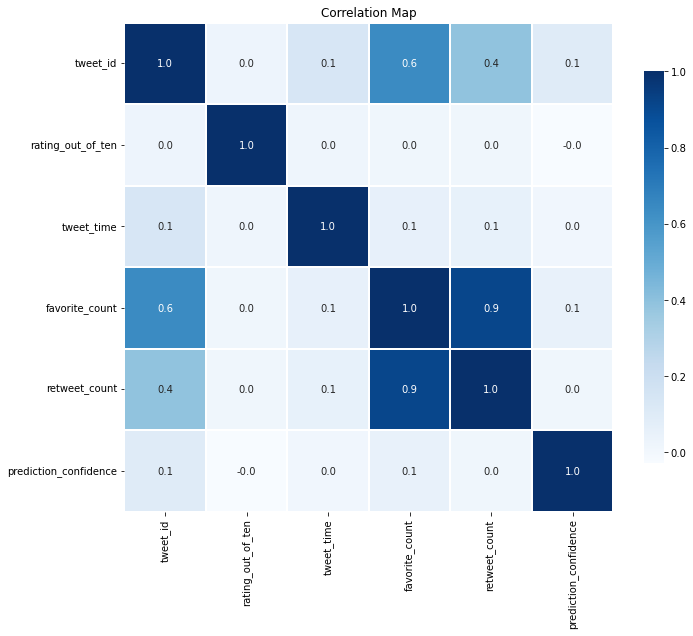

In [310]:
import seaborn as sns
f,ax = plt.subplots(figsize=(11, 9));
sns.heatmap(df[[
    'tweet_id', 'tweet_source',
    'rating_out_of_ten','tweet_time','favorite_count',
    'retweet_count','prediction_confidence'
]].corr(),
            cmap="Blues", square=True, annot=True, fmt= '.1f',ax=ax,
           linewidth=0.2, cbar_kws={"shrink": .8});
plt.title('Correlation Map');

# Analyze heatmap
>1. From the map There is only one strong correlation between  **'favorite_count'** and **'retweet_count'** : This is obviously the most favorite ❤️ , the most retweeted ⏎
>2. From the map There is moderator correlation between  **'favorite_count'** and **'tweet_id'** : This is Normal the most favorite ❤️ , the more tweets
>3. 'prediction_confidence' don't have any relation between with any other ploted variable 
>4. 'rating_out_of_ten' don't have any relation between with any other ploted variable 
>5. 'tweet_time' have week corelation with 

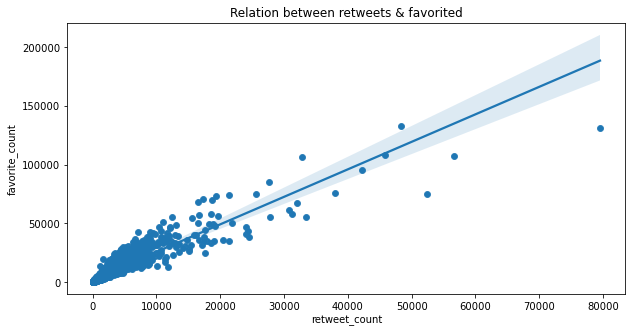

In [311]:
# plot the relationship between 'favorite_count' and 'retweet_count' 
#  define plot size
plt.figure(figsize=(10, 5));
sns.scatterplot(data = df, x = 'retweet_count', y = 'favorite_count')
sns.regplot(x="retweet_count",
            y="favorite_count", 
            data=df);
plt.title("Relation between retweets & favorited");

plt.show()

# Analyze scatterplot
>Positive linear relationship between the number of retweets and the number of favorited tweets

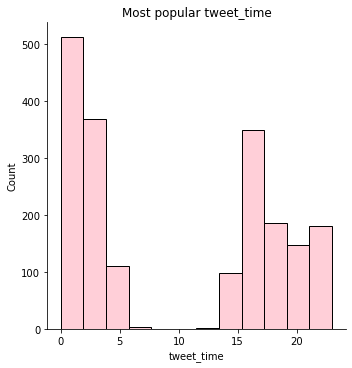

In [312]:
# Plot 'tweet_time' 
sns.displot(df, x='tweet_time', color="pink");
plt.title("Most popular tweet_time");

# Analyze Histogram
> From the hist plot we observed:
>1. Tweets are highest between 0:00 and 3:00 a.m
>2. There are no tweets between 6 am and 2 pm

In [313]:
#Check most days and months and years tweeted in
df[["year", "month", "day"]] = df["tweet_date"].str.split("-", expand = True)

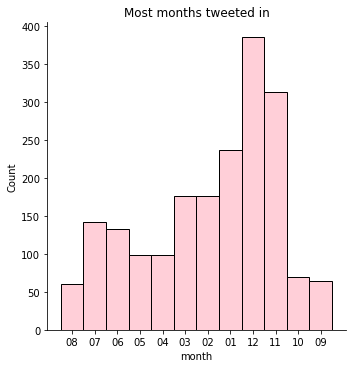

In [314]:
#plot Most months tweeted in
sns.displot(df, x="month", color="pink");
plt.title("Most months tweeted in");

> December is the Most Month tweeted in

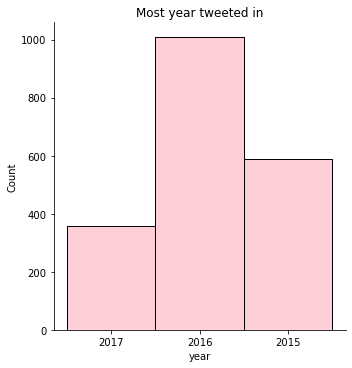

In [315]:
#plot Most year tweeted in
sns.displot(df, x="year", color="pink");
plt.title("Most year tweeted in");

> 2016 is the Most year tweeted in

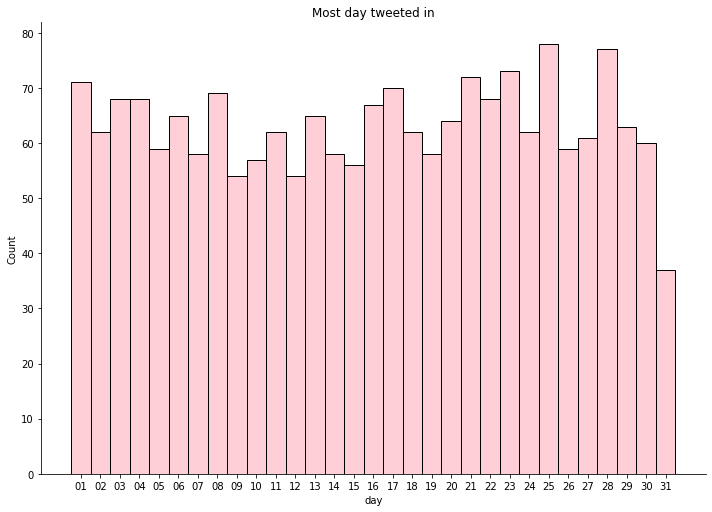

In [316]:
#plot Most day tweeted in
days = df.sort_values("day", ascending=True)
sns.displot(days, x="day", height=7, aspect=10/7, color="pink");
plt.title("Most day tweeted in");

> days 25, 28 , 01 Are the most days tweeted in 

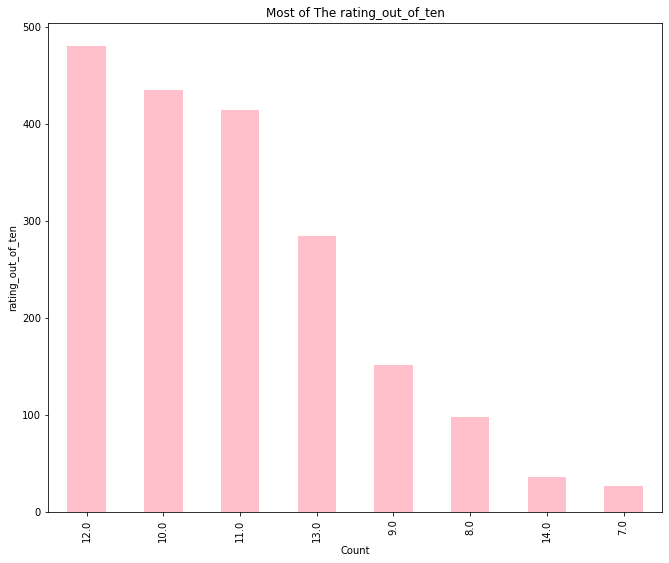

In [317]:
#plot rating_out_of_ten
plt.figure(figsize=(11, 9));
rating_out_of_ten = df.groupby('rating_out_of_ten').filter(lambda x: len(x) >= 20)
rating_out_of_ten['rating_out_of_ten'].value_counts().plot(kind = 'bar', color='pink')
plt.title('Most of The rating_out_of_ten');
plt.xlabel('Count');
plt.ylabel('rating_out_of_ten');

> More then 75% of tweet has 12/10 rating
> The min rating is 2/10

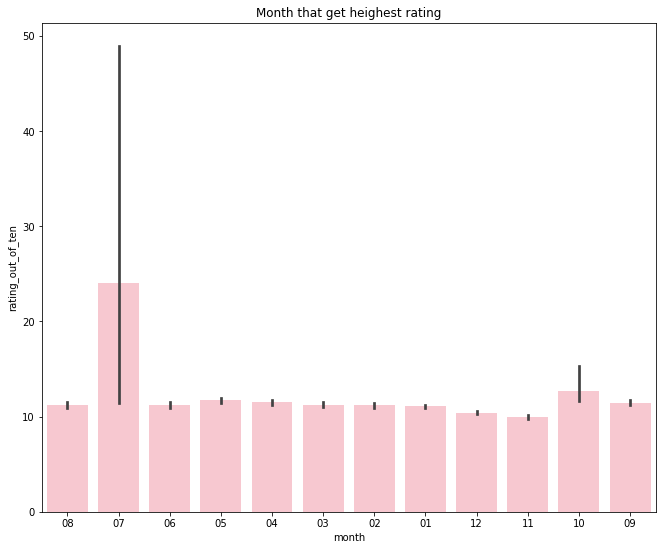

In [318]:
# plot the month that get heighest rating 
plt.figure(figsize=(11, 9));
sns.set_color_codes("pastel")
sns.barplot(x="month", y="rating_out_of_ten", data=df,
            label="Rating", color="pink");
plt.title("Month that get heighest rating");

> July is the month that get highest rating

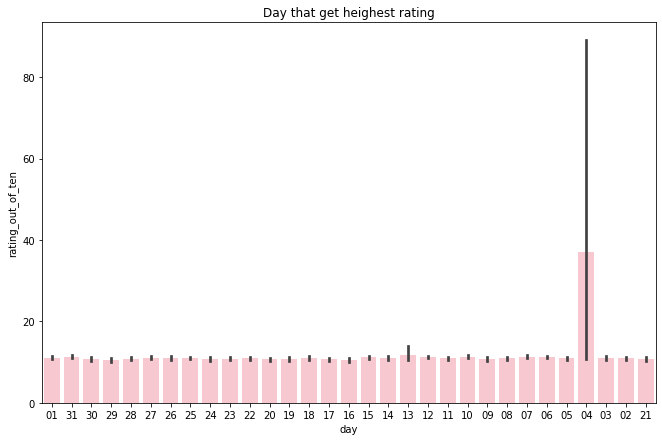

In [319]:
# plot the day that get heighest rating 
plt.figure(figsize=(11, 7));
sns.set_color_codes("pastel")
sns.barplot(x="day", y="rating_out_of_ten", data=df,
            label="Rating", color="pink");
plt.title("Day that get heighest rating");

> The 4th day of the month is the day that get Highest rating

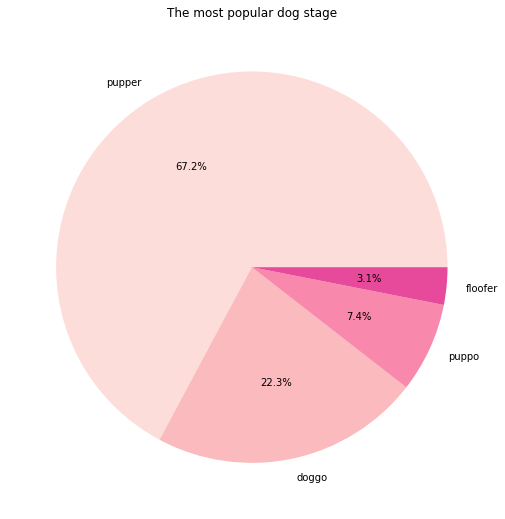

In [320]:
#plot the most popular dog stage
plt.figure(figsize=(11, 9));
colors = sns.color_palette('RdPu')
labels= ['pupper','doggo','puppo','floofer']
plt.pie(df['dogtionary'].value_counts(),labels=labels, colors = colors, autopct='%1.1f%%')
plt.title('The most popular dog stage')
plt.show()

> Pupper is the most popular dog stage

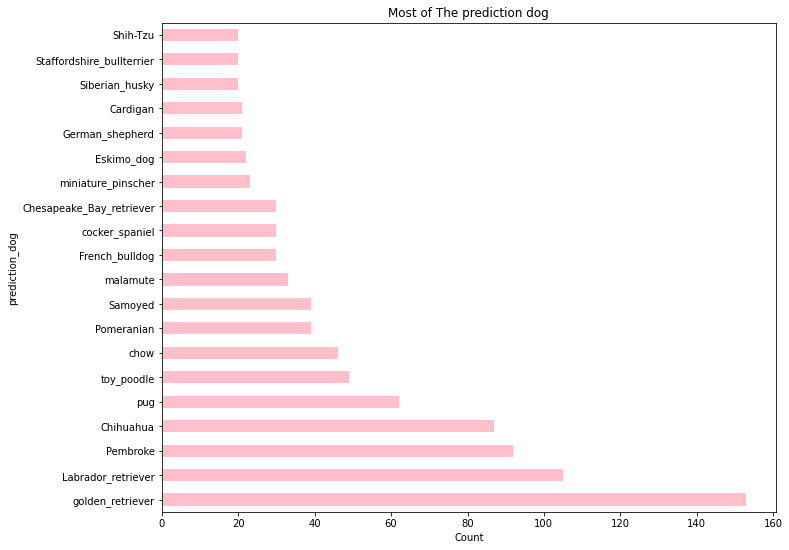

In [321]:
# specify the lengh to get good result
plt.figure(figsize=(11, 9));
prediction_dog = df.groupby('prediction_dog').filter(lambda x: len(x) >= 20)
prediction_dog['prediction_dog'].value_counts().plot(kind = 'barh', color='pink')
plt.title('Most of The prediction dog');
plt.xlabel('Count');
plt.ylabel('prediction_dog');

> Golden_retriever is the most prediction dog

https://amueller.github.io/word_cloud/auto_examples/masked.html#sphx-glr-download-auto-examples-masked-py

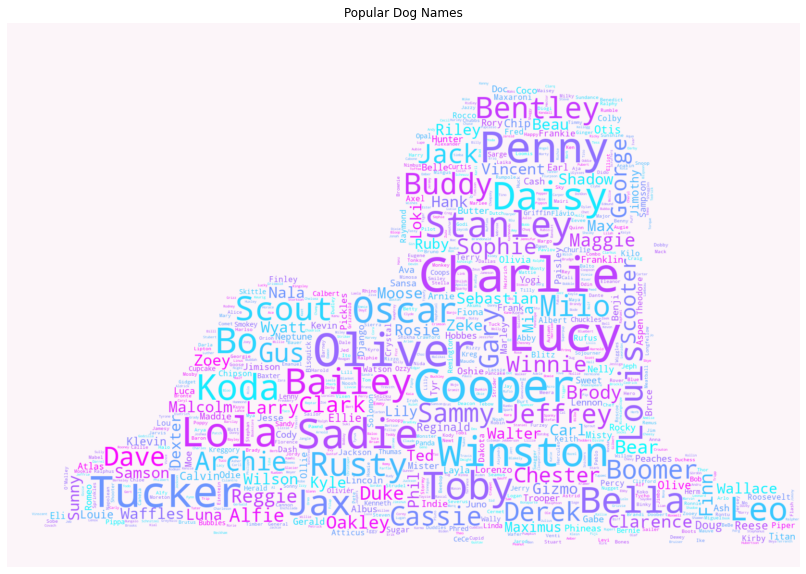

In [322]:
#  creating wordcloud with most frequent names for Dogs
from os import path
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()


#  create the word cloud text
text = []
for name in df.dog_name.values:
    # excluding NaN
    if name != np.nan:
        text.append(name)
text = ' '.join(map(str, text))
text = text.replace('nan','')


# read the image from directory path
dog_mask = np.array(Image.open(path.join(d, "img/golden-retriever.png")))

wc = WordCloud(
    width = 500,
    height = 480,
    background_color="#fcf5f9",
    max_words=5000,
    mask = dog_mask,
    colormap='cool',
    max_font_size=100,
    random_state=42
)
# generate word cloud
wc.generate(text)

#  show word cloud
plt.figure(figsize=(20, 10));
plt.axis("off")
plt.title("Popular Dog Names");
plt.imshow(wc, interpolation="bilinear");


[Go up](#up)